## Data Loading

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

from processing_utils.feature_data_from_mat import load_subject_high_gamma

In [2]:
sig = True
zscore = False

Load in S14 Data

In [3]:
phon_labels = ['a', 'ae', 'i', 'u', 'b', 'p', 'v', 'g', 'k']

In [4]:
S14_hg_trace, S14_hg_map, S14_phon_labels = load_subject_high_gamma('S14', sig_channel=sig, zscore=zscore)

(144, 200, 111)
(144, 8, 16, 200)
(144, 3)


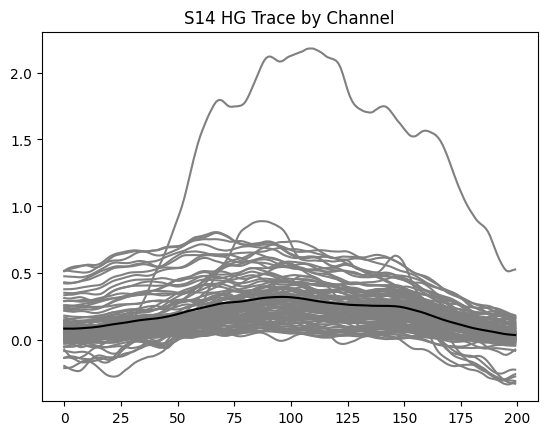

In [5]:
print(S14_hg_trace.shape)
print(S14_hg_map.shape)
print(S14_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S14_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S14_hg_trace, axis=0), axis=1), 'black')
plt.title('S14 HG Trace by Channel')
plt.show()

Load in S26 Data

In [6]:
S26_hg_trace, S26_hg_map, S26_phon_labels = load_subject_high_gamma('S26', sig_channel=sig, zscore=zscore)

(148, 200, 111)
(148, 8, 16, 200)
(148, 3)


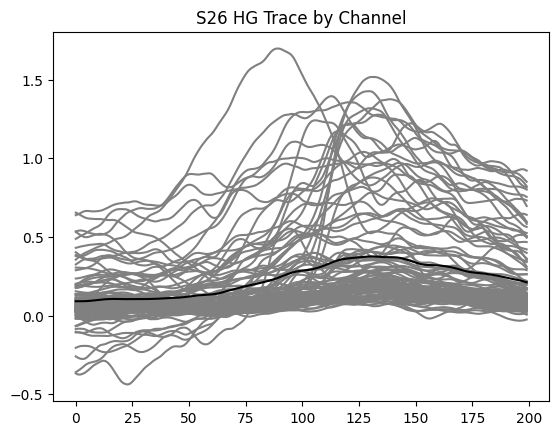

In [7]:
print(S26_hg_trace.shape)
print(S26_hg_map.shape)
print(S26_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S26_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S26_hg_trace, axis=0), axis=1), 'black')
plt.title('S26 HG Trace by Channel')
plt.show()

Load in S23 Data

In [8]:
S23_hg_trace, S23_hg_map, S23_phon_labels = load_subject_high_gamma('S23', sig_channel=sig, zscore=zscore)

(151, 200, 63)
(151, 8, 16, 200)
(151, 3)


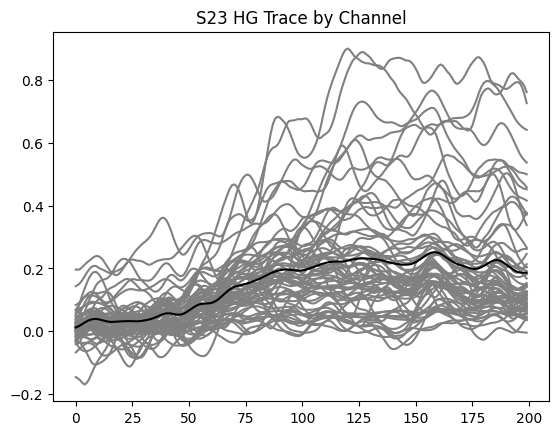

In [9]:
print(S23_hg_trace.shape)
print(S23_hg_map.shape)
print(S23_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S23_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S23_hg_trace, axis=0), axis=1), 'black')
plt.title('S23 HG Trace by Channel')
plt.show()

Load in S33 Data

In [10]:
S33_hg_trace, S33_hg_map, S33_phon_labels = load_subject_high_gamma('S33', sig_channel=sig, zscore=zscore)

(46, 200, 149)
(46, 12, 24, 200)
(46, 3)


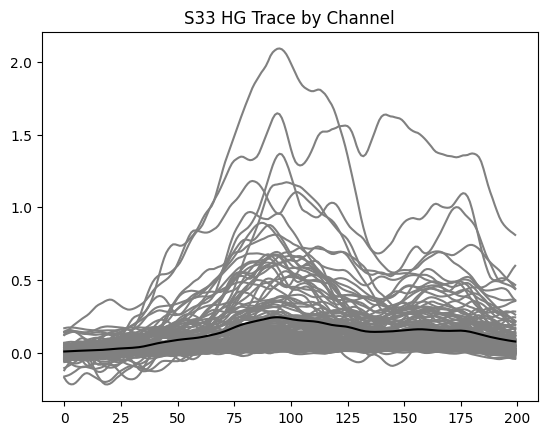

In [11]:
print(S33_hg_trace.shape)
print(S33_hg_map.shape)
print(S33_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S33_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S33_hg_trace, axis=0), axis=1), 'black')
plt.title('S33 HG Trace by Channel')
plt.show()

## PCA Visualization

In [ ]:
from sklearn.decomposition import PCA

### Time-Dimension Concatenated w/ Trials (Trials*Time x Channels)

#### PCA on Trial-Time Dim

In [ ]:
X_S14_T_ext = np.reshape(S14_hg_trace, (S14_hg_trace.shape[0]*S14_hg_trace.shape[1], S14_hg_trace.shape[2]))
X_S26_T_ext = np.reshape(S26_hg_trace, (S26_hg_trace.shape[0]*S26_hg_trace.shape[1], S26_hg_trace.shape[2]))
X_S23_T_ext = np.reshape(S23_hg_trace, (S23_hg_trace.shape[0]*S23_hg_trace.shape[1], S23_hg_trace.shape[2]))
X_S33_T_ext = np.reshape(S33_hg_trace, (S33_hg_trace.shape[0]*S33_hg_trace.shape[1], S33_hg_trace.shape[2]))

In [ ]:
n_features = 10
pca = PCA(n_components=n_features)
Xt_ext_S14 = pca.fit_transform(X_S14_T_ext)
Xt_ext_S26 = pca.fit_transform(X_S26_T_ext)
Xt_ext_S23 = pca.fit_transform(X_S23_T_ext)
Xt_ext_S33 = pca.fit_transform(X_S33_T_ext)

In [ ]:
tr_alpha = 0.15

plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(Xt_ext_S14[:, 0], Xt_ext_S14[:, 1], Xt_ext_S14[:, 2], color='blue', label='S14', alpha=tr_alpha)
ax.scatter(Xt_ext_S26[:, 0], Xt_ext_S26[:, 1], Xt_ext_S26[:, 2], color='red', label='S26', alpha=tr_alpha)
ax.scatter(Xt_ext_S23[:, 0], Xt_ext_S23[:, 1], Xt_ext_S23[:, 2], color='green', label='S23', alpha=tr_alpha)
ax.scatter(Xt_ext_S33[:, 0], Xt_ext_S33[:, 1], Xt_ext_S33[:, 2], color='orange', label='S33', alpha=tr_alpha)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.title('PCA on Trial-Time Extended Data')
plt.show()

In [ ]:
lat_dyn_S14_ext = np.reshape(Xt_ext_S14, (S14_hg_trace.shape[0], S14_hg_trace.shape[1], n_features))
lat_dyn_S26_ext = np.reshape(Xt_ext_S26, (S26_hg_trace.shape[0], S26_hg_trace.shape[1], n_features))
lat_dyn_S23_ext = np.reshape(Xt_ext_S23, (S23_hg_trace.shape[0], S23_hg_trace.shape[1], n_features))
lat_dyn_S33_ext = np.reshape(Xt_ext_S33, (S33_hg_trace.shape[0], S33_hg_trace.shape[1], n_features))

#### Trial-Averaged (Likely Not Super Useful)

In [ ]:
tr_avg_lat_dyn_S14_ext = np.mean(lat_dyn_S14_ext, axis=0)
tr_avg_lat_dyn_S26_ext = np.mean(lat_dyn_S26_ext, axis=0)
tr_avg_lat_dyn_S23_ext = np.mean(lat_dyn_S23_ext, axis=0)
tr_avg_lat_dyn_S33_ext = np.mean(lat_dyn_S33_ext, axis=0)

In [ ]:
t = np.linspace(-0.5, 0.5, S14_hg_trace.shape[1])

plt.figure(figsize=(10,8))
plt.plot(t, lat_dyn_S14_ext[:,:,0].T, color='blue', alpha=tr_alpha)
plt.plot(t, tr_avg_lat_dyn_S14_ext[:,0], color='blue', label='S14', linewidth=3)
plt.plot(t, lat_dyn_S26_ext[:,:,0].T, color='red', alpha=tr_alpha)
plt.plot(t, tr_avg_lat_dyn_S26_ext[:,0], color='red', label='S26', linewidth=3)
plt.plot(t, lat_dyn_S23_ext[:,:,0].T, color='green', alpha=tr_alpha)
plt.plot(t, tr_avg_lat_dyn_S23_ext[:,0], color='green', label='S23', linewidth=3)
plt.plot(t, lat_dyn_S33_ext[:,:,0].T, color='orange', alpha=tr_alpha)
plt.plot(t, tr_avg_lat_dyn_S33_ext[:,0], color='orange', label='S33', linewidth=3)
plt.xlabel('Time (s)')
plt.ylabel('PC1')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.set_box_aspect(aspect=None, zoom=0.85)
ax.plot(tr_avg_lat_dyn_S14_ext[:, 0], tr_avg_lat_dyn_S14_ext[:, 1], tr_avg_lat_dyn_S14_ext[:, 2], color='blue', label='S14')
ax.scatter(tr_avg_lat_dyn_S14_ext[0, 0], tr_avg_lat_dyn_S14_ext[0, 1], tr_avg_lat_dyn_S14_ext[0, 2], color='blue')
ax.scatter(tr_avg_lat_dyn_S14_ext[-1, 0], tr_avg_lat_dyn_S14_ext[-1, 1], tr_avg_lat_dyn_S14_ext[-1, 2], marker='>', color='blue')
ax.plot(tr_avg_lat_dyn_S26_ext[:, 0], tr_avg_lat_dyn_S26_ext[:, 1], tr_avg_lat_dyn_S26_ext[:, 2], color='red', label='S26')
ax.scatter(tr_avg_lat_dyn_S26_ext[0, 0], tr_avg_lat_dyn_S26_ext[0, 1], tr_avg_lat_dyn_S26_ext[0, 2], color='red')
ax.scatter(tr_avg_lat_dyn_S26_ext[-1, 0], tr_avg_lat_dyn_S26_ext[-1, 1], tr_avg_lat_dyn_S26_ext[-1, 2], marker='>', color='red')
ax.plot(tr_avg_lat_dyn_S23_ext[:, 0], tr_avg_lat_dyn_S23_ext[:, 1], tr_avg_lat_dyn_S23_ext[:, 2], color='green', label='S23')
ax.scatter(tr_avg_lat_dyn_S23_ext[0, 0], tr_avg_lat_dyn_S23_ext[0, 1], tr_avg_lat_dyn_S23_ext[0, 2], color='green')
ax.scatter(tr_avg_lat_dyn_S23_ext[-1, 0], tr_avg_lat_dyn_S23_ext[-1, 1], tr_avg_lat_dyn_S23_ext[-1, 2], marker='>', color='green')
ax.plot(tr_avg_lat_dyn_S33_ext[:, 0], tr_avg_lat_dyn_S33_ext[:, 1], tr_avg_lat_dyn_S33_ext[:, 2], color='orange', label='S33')
ax.scatter(tr_avg_lat_dyn_S33_ext[0, 0], tr_avg_lat_dyn_S33_ext[0, 1], tr_avg_lat_dyn_S33_ext[0, 2], color='orange')
ax.scatter(tr_avg_lat_dyn_S33_ext[-1, 0], tr_avg_lat_dyn_S33_ext[-1, 1], tr_avg_lat_dyn_S33_ext[-1, 2], marker='>', color='orange')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.title('Latent Dynamics PCA on Trial-Time Extended Data')
plt.show()

#### Class-Averaged

In [ ]:
def labels2str(labels, seq_ind=None):
    labels_str = []
    for i in range(labels.shape[0]):
        if seq_ind is None:
            labels_str.append(''.join(str(x) for x in labels[i, :]))
        else:
            labels_str.append(str(labels[i, seq_ind]))
    return np.array(labels_str)

S14_str_labels_p1 = labels2str(S14_phon_labels, seq_ind=0)
S26_str_labels_p1 = labels2str(S26_phon_labels, seq_ind=0)
S23_str_labels_p1 = labels2str(S23_phon_labels, seq_ind=0)
S33_str_labels_p1 = labels2str(S33_phon_labels, seq_ind=0)

In [ ]:
def group_by_class(data, labels):
    data_by_class = np.zeros((len(np.unique(labels)), data.shape[1],
                              data.shape[2]))
    for i, seq in enumerate(np.unique(labels)):
        data_by_class[i,:,:] = np.mean(data[labels == seq, :, :], axis=0)
    return data_by_class

lat_dyn_S14_p1_sep = group_by_class(lat_dyn_S14_ext, S14_str_labels_p1)
lat_dyn_S26_p1_sep = group_by_class(lat_dyn_S26_ext, S26_str_labels_p1)
lat_dyn_S23_p1_sep = group_by_class(lat_dyn_S23_ext, S23_str_labels_p1)
lat_dyn_S33_p1_sep = group_by_class(lat_dyn_S33_ext, S33_str_labels_p1)


In [ ]:
pt_list = ['S14', 'S26', 'S23', 'S33']
pt_p1_labels = [S14_str_labels_p1, S26_str_labels_p1, S23_str_labels_p1, S33_str_labels_p1]
pt_lat_dyn = [lat_dyn_S14_p1_sep, lat_dyn_S26_p1_sep, lat_dyn_S23_p1_sep, lat_dyn_S33_p1_sep]
pc_ind = 0

f, axs = plt.subplots(2, 2, figsize=(12,10))
for i, ax in enumerate(axs.flat):
    curr_lat_dyn = pt_lat_dyn[i]
    curr_lab = pt_p1_labels[i]
    for j, _ in enumerate(np.unique(curr_lab)):
        ax.plot(t, curr_lat_dyn[j,:,pc_ind], label=phon_labels[j], linewidth=3)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel(f'PC{pc_ind+1}')
    ax.set_title(f'{pt_list[i]}, Unaligned')
plt.legend(bbox_to_anchor=(1.25, 1), loc="center right")
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.set_box_aspect(aspect=None, zoom=0.85)
for i, seq in enumerate(np.unique(S14_str_labels_p1)):
    ax.plot(lat_dyn_S14_p1_sep[i, :, 0], lat_dyn_S14_p1_sep[i, :, 1], lat_dyn_S14_p1_sep[i, :, 2], label=phon_labels[i], linewidth=3, alpha=0.6)
    ax.scatter(lat_dyn_S14_p1_sep[i, 0, 0], lat_dyn_S14_p1_sep[i, 0, 1], lat_dyn_S14_p1_sep[i, 0, 2], s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend(bbox_to_anchor=(1.12, 0.5), loc="center right")
plt.title('Latent Dynamics PCA on Trial-Time Extended Data')
plt.show()

In [ ]:
f = plt.figure(figsize=(12,12))
sp = [221, 222, 223, 224]

for i, sp_type in enumerate(sp):
    ax = f.add_subplot(sp_type, projection='3d')
    curr_lat_dyn = pt_lat_dyn[i]
    curr_lab = pt_p1_labels[i]
    for j, _ in enumerate(np.unique(curr_lab)):   
        ax.plot(curr_lat_dyn[j, :,0], curr_lat_dyn[j, :,1], curr_lat_dyn[j, :,2], label=phon_labels[j], linewidth=3, alpha=0.6)
        ax.scatter(curr_lat_dyn[j, 0,0], curr_lat_dyn[j, 0,1], curr_lat_dyn[j, 0,2], s=50)
        # ax.scatter(curr_lat_dyn[j][-1,0], curr_lat_dyn[j][-1,1], curr_lat_dyn[j][-1,2], s=50, marker='>') 
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    # ax.set_xlim([-11.5, 15])
    # ax.set_ylim([-6.5, 6.2])
    # ax.set_zlim([-2.5, 3])
    ax.set_title(f'{pt_list[i]}, Unaligned')

plt.legend(bbox_to_anchor=(1.25, 1), loc="center right")
plt.suptitle('Latent Dynamics PCA on Trial-Time Extended Data')
plt.show()

#### CCA Alignment

In [ ]:
def CCA_align(L_a, L_b):
    """ Alignment method from https://www.nature.com/articles/s41593-019-0555-4#Sec11
    L_x has shape (m, T), where m is number of PCs and T is n_trials * n_timepoints
    m, T must be same for both L_a and L_b
    """
    # QR decomposition
    Q_a, R_a = np.linalg.qr(L_a.T)
    Q_b, R_b = np.linalg.qr(L_b.T)

    # SVD on q inner product
    U, S, Vt = np.linalg.svd(Q_a.T @ Q_b)

    # calculate manifold directions
    M_a = np.linalg.pinv(R_a) @ U
    M_b = np.linalg.pinv(R_b) @ Vt.T

    return M_a, M_b

##### Sequence Instances

In [ ]:
S14_str_labels_all = labels2str(S14_phon_labels, seq_ind=None)
S26_str_labels_all = labels2str(S26_phon_labels, seq_ind=None)
S23_str_labels_all = labels2str(S23_phon_labels, seq_ind=None)
S33_str_labels_all = labels2str(S33_phon_labels, seq_ind=None)

lat_dyn_S14_seq_sep = group_by_class(lat_dyn_S14_ext, S14_str_labels_all)
lat_dyn_S26_seq_sep = group_by_class(lat_dyn_S26_ext, S26_str_labels_all)
lat_dyn_S23_seq_sep = group_by_class(lat_dyn_S23_ext, S23_str_labels_all)
lat_dyn_S33_seq_sep = group_by_class(lat_dyn_S33_ext, S33_str_labels_all)

In [ ]:
L_seq_S14 = np.reshape(lat_dyn_S14_seq_sep, (lat_dyn_S14_seq_sep.shape[0]*lat_dyn_S14_seq_sep.shape[1], lat_dyn_S14_seq_sep.shape[2]))
L_seq_S26 = np.reshape(lat_dyn_S26_seq_sep, (lat_dyn_S26_seq_sep.shape[0]*lat_dyn_S26_seq_sep.shape[1], lat_dyn_S26_seq_sep.shape[2]))
L_seq_S23 = np.reshape(lat_dyn_S23_seq_sep, (lat_dyn_S23_seq_sep.shape[0]*lat_dyn_S23_seq_sep.shape[1], lat_dyn_S23_seq_sep.shape[2]))
L_seq_S33 = np.reshape(lat_dyn_S33_seq_sep, (lat_dyn_S33_seq_sep.shape[0]*lat_dyn_S33_seq_sep.shape[1], lat_dyn_S33_seq_sep.shape[2]))

In [ ]:
M_seq_S14, M_seq_S26 = CCA_align(L_seq_S14.T, L_seq_S26.T)
L_new_seq_S14 = L_seq_S14 @ M_seq_S14
L_new_seq_S26 = L_seq_S26 @ M_seq_S26

In [ ]:
L_new_seq_S14 = np.reshape(L_new_seq_S14, (lat_dyn_S14_seq_sep.shape[0], lat_dyn_S14_seq_sep.shape[1], lat_dyn_S14_seq_sep.shape[2]))
L_new_seq_S26 = np.reshape(L_new_seq_S26, (lat_dyn_S26_seq_sep.shape[0], lat_dyn_S26_seq_sep.shape[1], lat_dyn_S26_seq_sep.shape[2]))

In [ ]:
pt_L_new_seq = [L_new_seq_S14, L_new_seq_S26]
pt_seq_labels = [S14_str_labels_all, S26_str_labels_all]
pc_ind = 0

f, axs = plt.subplots(1, 2, figsize=plt.figaspect(0.5), sharey=True)
for i, ax in enumerate(axs.flat):
    L_new_curr = pt_L_new_seq[i]
    curr_lab = pt_seq_labels[i]
    for j, seq in enumerate(np.unique(curr_lab)):
        ax.plot(t, L_new_curr[j,:,pc_ind], label=seq, linewidth=3)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel(f'PC{pc_ind+1}')
    ax.set_title(f'{pt_list[i]}, CCA Aligned')
plt.legend(bbox_to_anchor=(1.25, 0.5), loc="center right")
plt.show()

In [ ]:
f = plt.figure(figsize=plt.figaspect(0.5))
sp = [121, 122]

for i, sp_type in enumerate(sp):
    ax = f.add_subplot(sp_type, projection='3d')
    L_new_curr = pt_L_new_seq[i]
    curr_lab = pt_seq_labels[i]
    for j, seq in enumerate(np.unique(curr_lab)):   
        ax.plot(L_new_curr[j, :,0], L_new_curr[j, :,1], L_new_curr[j, :,2], label=seq, linewidth=3, alpha=0.6)
        ax.scatter(L_new_curr[j, 0,0], L_new_curr[j, 0,1], L_new_curr[j, 0,2], s=50)
        # ax.scatter(curr_lat_dyn[j][-1,0], curr_lat_dyn[j][-1,1], curr_lat_dyn[j][-1,2], s=50, marker='>') 
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_xlim([-0.03, 0.03])
    ax.set_ylim([-0.03, 0.03])
    ax.set_zlim([-0.03, 0.03])
    ax.set_title(f'{pt_list[i]}, CCA Aligned')

plt.legend(bbox_to_anchor=(1.4, 0.5), loc="center right")
plt.suptitle('Latent Dynamics PCA on Trial-Time Extended Data')
plt.show()

##### P1 Instances

In [ ]:
L_p1_S14 = np.reshape(lat_dyn_S14_p1_sep, (lat_dyn_S14_p1_sep.shape[0]*lat_dyn_S14_p1_sep.shape[1], lat_dyn_S14_p1_sep.shape[2]))
L_p1_S26 = np.reshape(lat_dyn_S26_p1_sep, (lat_dyn_S26_p1_sep.shape[0]*lat_dyn_S26_p1_sep.shape[1], lat_dyn_S26_p1_sep.shape[2]))
L_p1_S23 = np.reshape(lat_dyn_S23_p1_sep, (lat_dyn_S23_p1_sep.shape[0]*lat_dyn_S23_p1_sep.shape[1], lat_dyn_S23_p1_sep.shape[2]))
L_p1_S33 = np.reshape(lat_dyn_S33_p1_sep, (lat_dyn_S33_p1_sep.shape[0]*lat_dyn_S33_p1_sep.shape[1], lat_dyn_S33_p1_sep.shape[2]))

###### Aligning S14 & S26 to common space

In [ ]:
M_p1_S14, M_p1_S26 = CCA_align(L_p1_S14.T, L_p1_S26.T)
L_new_p1_S14 = L_p1_S14 @ M_p1_S14
L_new_p1_S26 = L_p1_S26 @ M_p1_S26

In [ ]:
L_new_p1_S14 = np.reshape(L_new_p1_S14, (lat_dyn_S14_p1_sep.shape[0], lat_dyn_S14_p1_sep.shape[1], lat_dyn_S14_p1_sep.shape[2]))
L_new_p1_S26 = np.reshape(L_new_p1_S26, (lat_dyn_S26_p1_sep.shape[0], lat_dyn_S26_p1_sep.shape[1], lat_dyn_S26_p1_sep.shape[2]))

In [ ]:
pt_L_new_p1 = [L_new_p1_S14, L_new_p1_S26]
pc_ind = 0

f, axs = plt.subplots(1, 2, figsize=plt.figaspect(0.5), sharey=True)
for i, ax in enumerate(axs.flat):
    L_new_curr = pt_L_new_p1[i]
    curr_lab = pt_p1_labels[i]
    for j, _ in enumerate(np.unique(curr_lab)):
        ax.plot(t, L_new_curr[j,:,pc_ind], label=phon_labels[j], linewidth=3)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel(f'PC{pc_ind+1}')
    ax.set_title(f'{pt_list[i]}, CCA Aligned')
plt.legend(bbox_to_anchor=(1.25, 0.5), loc="center right")
plt.show()

In [ ]:
f = plt.figure(figsize=plt.figaspect(0.5))
sp = [121, 122]

for i, sp_type in enumerate(sp):
    ax = f.add_subplot(sp_type, projection='3d')
    L_new_curr = pt_L_new_p1[i]
    curr_lab = pt_p1_labels[i]
    for j, _ in enumerate(np.unique(curr_lab)):   
        ax.plot(L_new_curr[j, :,0], L_new_curr[j, :,1], L_new_curr[j, :,2], label=phon_labels[j], linewidth=3, alpha=0.6)
        ax.scatter(L_new_curr[j, 0,0], L_new_curr[j, 0,1], L_new_curr[j, 0,2], s=50)
        # ax.scatter(curr_lat_dyn[j][-1,0], curr_lat_dyn[j][-1,1], curr_lat_dyn[j][-1,2], s=50, marker='>') 
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_xlim([-0.05, 0.05])
    ax.set_ylim([-0.08, 0.08])
    ax.set_zlim([-0.08, 0.08])
    ax.set_title(f'{pt_list[i]}, CCA Aligned')

plt.legend(bbox_to_anchor=(1.4, 0.5), loc="center right")
plt.suptitle('Latent Dynamics PCA on Trial-Time Extended Data')
plt.show()

###### Aligning S26, S23, & S33 to S14

In [ ]:
M_p1_S14_S26, M_p1_S26_S14 = CCA_align(L_p1_S14.T, L_p1_S26.T)
L_new_p1_S26_S14 = L_p1_S26 @ M_p1_S26_S14 @ np.linalg.pinv(M_p1_S14_S26)
L_new_p1_S26_S14 = np.reshape(L_new_p1_S26_S14, (lat_dyn_S26_p1_sep.shape[0], lat_dyn_S26_p1_sep.shape[1], lat_dyn_S26_p1_sep.shape[2]))

M_p1_S14_S23, M_p1_S23_S14 = CCA_align(L_p1_S14.T, L_p1_S23.T)
L_new_p1_S23_S14 = L_p1_S23 @ M_p1_S23_S14 @ np.linalg.pinv(M_p1_S14_S23)
L_new_p1_S23_S14 = np.reshape(L_new_p1_S23_S14, (lat_dyn_S23_p1_sep.shape[0], lat_dyn_S23_p1_sep.shape[1], lat_dyn_S23_p1_sep.shape[2]))

M_p1_S14_S33, M_p1_S33_S14 = CCA_align(L_p1_S14.T, L_p1_S33.T)
L_new_p1_S33_S14 = L_p1_S33 @ M_p1_S33_S14 @ np.linalg.pinv(M_p1_S14_S33)
L_new_p1_S33_S14 = np.reshape(L_new_p1_S33_S14, (lat_dyn_S33_p1_sep.shape[0], lat_dyn_S33_p1_sep.shape[1], lat_dyn_S33_p1_sep.shape[2]))

In [ ]:
pt_L_new_p1 = [lat_dyn_S14_p1_sep, L_new_p1_S26_S14, L_new_p1_S23_S14, L_new_p1_S33_S14]
pc_ind = 0


f, axs = plt.subplots(2, 2, figsize=(12,10))
for i, ax in enumerate(axs.flat):
    L_new_curr = pt_L_new_p1[i]
    curr_lab = pt_p1_labels[i]
    for j, _ in enumerate(np.unique(curr_lab)):
        ax.plot(t, L_new_curr[j,:,pc_ind], label=phon_labels[j], linewidth=3)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel(f'PC{pc_ind+1}')
    ax.set_title(f'{pt_list[i]}, Aligned to S14')
plt.legend(bbox_to_anchor=(1.25, 1), loc="center right")
plt.show()

In [ ]:
f = plt.figure(figsize=(12,12))
sp = [221, 222, 223, 224]

for i, sp_type in enumerate(sp):
    ax = f.add_subplot(sp_type, projection='3d')
    L_new_curr = pt_L_new_p1[i]
    curr_lab = pt_p1_labels[i]
    for j, _ in enumerate(np.unique(curr_lab)):   
        ax.plot(L_new_curr[j, :,0], L_new_curr[j, :,1], L_new_curr[j, :,2], label=phon_labels[j], linewidth=3, alpha=0.6)
        ax.scatter(L_new_curr[j, 0,0], L_new_curr[j, 0,1], L_new_curr[j, 0,2], s=50)
        # ax.scatter(curr_lat_dyn[j][-1,0], curr_lat_dyn[j][-1,1], curr_lat_dyn[j][-1,2], s=50, marker='>') 
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    # ax.set_xlim([-0.05, 0.05])
    # ax.set_ylim([-0.08, 0.08])
    # ax.set_zlim([-0.08, 0.08])
    ax.set_title(f'{pt_list[i]}, Aligned to S14')

plt.legend(bbox_to_anchor=(1.4, 0.5), loc="center right")
plt.suptitle('Latent Dynamics PCA on Trial-Time Extended Data')
plt.show()

###### Aligning S14, S23, S33 to S26

In [ ]:
M_p1_S26_S14, M_p1_S14_S26 = CCA_align(L_p1_S26.T, L_p1_S14.T)
L_new_p1_S14_S26 = L_p1_S14 @ M_p1_S14_S26 @ np.linalg.pinv(M_p1_S26_S14)
L_new_p1_S14_S26 = np.reshape(L_new_p1_S14_S26, (lat_dyn_S14_p1_sep.shape[0], lat_dyn_S14_p1_sep.shape[1], lat_dyn_S14_p1_sep.shape[2]))

M_p1_S26_S23, M_p1_S23_S26 = CCA_align(L_p1_S26.T, L_p1_S23.T)
L_new_p1_S23_S26 = L_p1_S23 @ M_p1_S23_S26 @ np.linalg.pinv(M_p1_S26_S23)
L_new_p1_S23_S26 = np.reshape(L_new_p1_S23_S26, (lat_dyn_S23_p1_sep.shape[0], lat_dyn_S23_p1_sep.shape[1], lat_dyn_S23_p1_sep.shape[2]))

M_p1_S26_S33, M_p1_S33_S26 = CCA_align(L_p1_S26.T, L_p1_S33.T)
L_new_p1_S33_S26 = L_p1_S33 @ M_p1_S33_S26 @ np.linalg.pinv(M_p1_S26_S33)
L_new_p1_S33_S26 = np.reshape(L_new_p1_S33_S26, (lat_dyn_S33_p1_sep.shape[0], lat_dyn_S33_p1_sep.shape[1], lat_dyn_S33_p1_sep.shape[2]))

In [ ]:
pt_L_new_p1 = [L_new_p1_S14_S26, lat_dyn_S26_p1_sep, L_new_p1_S23_S26, L_new_p1_S33_S26]
pc_ind = 0


f, axs = plt.subplots(2, 2, figsize=(12,10))
for i, ax in enumerate(axs.flat):
    L_new_curr = pt_L_new_p1[i]
    curr_lab = pt_p1_labels[i]
    for j, _ in enumerate(np.unique(curr_lab)):
        ax.plot(t, L_new_curr[j,:,pc_ind], label=phon_labels[j], linewidth=3)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel(f'PC{pc_ind+1}')
    ax.set_title(f'{pt_list[i]}, Aligned to S26')
plt.legend(bbox_to_anchor=(1.25, 1), loc="center right")
plt.show()

In [ ]:
f = plt.figure(figsize=(12,12))
sp = [221, 222, 223, 224]

for i, sp_type in enumerate(sp):
    ax = f.add_subplot(sp_type, projection='3d')
    L_new_curr = pt_L_new_p1[i]
    curr_lab = pt_p1_labels[i]
    for j, _ in enumerate(np.unique(curr_lab)):   
        ax.plot(L_new_curr[j, :,0], L_new_curr[j, :,1], L_new_curr[j, :,2], label=phon_labels[j], linewidth=3, alpha=0.6)
        ax.scatter(L_new_curr[j, 0,0], L_new_curr[j, 0,1], L_new_curr[j, 0,2], s=50)
        # ax.scatter(curr_lat_dyn[j][-1,0], curr_lat_dyn[j][-1,1], curr_lat_dyn[j][-1,2], s=50, marker='>') 
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    # ax.set_xlim([-0.05, 0.05])
    # ax.set_ylim([-0.08, 0.08])
    # ax.set_zlim([-0.08, 0.08])
    ax.set_title(f'{pt_list[i]}, Aligned to S26')

plt.legend(bbox_to_anchor=(1.4, 0.5), loc="center right")
plt.suptitle('Latent Dynamics PCA on Trial-Time Extended Data')
plt.show()

###### Aligning S14, S26, S33 to S23

In [ ]:
M_p1_S23_S14, M_p1_S14_S23 = CCA_align(L_p1_S23.T, L_p1_S14.T)
L_new_p1_S14_S23 = L_p1_S14 @ M_p1_S14_S23 @ np.linalg.pinv(M_p1_S23_S14)
L_new_p1_S14_S23 = np.reshape(L_new_p1_S14_S23, (lat_dyn_S14_p1_sep.shape[0], lat_dyn_S14_p1_sep.shape[1], lat_dyn_S14_p1_sep.shape[2]))

M_p1_S23_S26, M_p1_S26_S23 = CCA_align(L_p1_S23.T, L_p1_S26.T)
L_new_p1_S26_S23 = L_p1_S26 @ M_p1_S26_S23 @ np.linalg.pinv(M_p1_S23_S26)
L_new_p1_S26_S23 = np.reshape(L_new_p1_S26_S23, (lat_dyn_S26_p1_sep.shape[0], lat_dyn_S26_p1_sep.shape[1], lat_dyn_S26_p1_sep.shape[2]))

M_p1_S23_S33, M_p1_S33_S23 = CCA_align(L_p1_S23.T, L_p1_S33.T)
L_new_p1_S33_S23 = L_p1_S33 @ M_p1_S33_S23 @ np.linalg.pinv(M_p1_S23_S33)
L_new_p1_S33_S23 = np.reshape(L_new_p1_S33_S23, (lat_dyn_S33_p1_sep.shape[0], lat_dyn_S33_p1_sep.shape[1], lat_dyn_S33_p1_sep.shape[2]))

In [ ]:
pt_L_new_p1 = [L_new_p1_S14_S23, L_new_p1_S26_S23, lat_dyn_S23_p1_sep, L_new_p1_S33_S23]
pc_ind = 0


f, axs = plt.subplots(2, 2, figsize=(12,10))
for i, ax in enumerate(axs.flat):
    L_new_curr = pt_L_new_p1[i]
    curr_lab = pt_p1_labels[i]
    for j, _ in enumerate(np.unique(curr_lab)):
        ax.plot(t, L_new_curr[j,:,pc_ind], label=phon_labels[j], linewidth=3)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel(f'PC{pc_ind+1}')
    ax.set_title(f'{pt_list[i]}, Aligned to S23')
plt.legend(bbox_to_anchor=(1.25, 1), loc="center right")
plt.show()

In [ ]:
f = plt.figure(figsize=(12,12))
sp = [221, 222, 223, 224]

for i, sp_type in enumerate(sp):
    ax = f.add_subplot(sp_type, projection='3d')
    L_new_curr = pt_L_new_p1[i]
    curr_lab = pt_p1_labels[i]
    for j, _ in enumerate(np.unique(curr_lab)):   
        ax.plot(L_new_curr[j, :,0], L_new_curr[j, :,1], L_new_curr[j, :,2], label=phon_labels[j], linewidth=3, alpha=0.6)
        ax.scatter(L_new_curr[j, 0,0], L_new_curr[j, 0,1], L_new_curr[j, 0,2], s=50)
        # ax.scatter(curr_lat_dyn[j][-1,0], curr_lat_dyn[j][-1,1], curr_lat_dyn[j][-1,2], s=50, marker='>') 
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    # ax.set_xlim([-0.05, 0.05])
    # ax.set_ylim([-0.08, 0.08])
    # ax.set_zlim([-0.08, 0.08])
    ax.set_title(f'{pt_list[i]}, Aligned to S23')

plt.legend(bbox_to_anchor=(1.4, 0.5), loc="center right")
plt.suptitle('Latent Dynamics PCA on Trial-Time Extended Data')
plt.show()

###### Aligning S14, S26, S23 to S33

In [ ]:
M_p1_S33_S14, M_p1_S14_S33 = CCA_align(L_p1_S33.T, L_p1_S14.T)
L_new_p1_S14_S33 = L_p1_S14 @ M_p1_S14_S33 @ np.linalg.pinv(M_p1_S33_S14)
L_new_p1_S14_S33 = np.reshape(L_new_p1_S14_S33, (lat_dyn_S14_p1_sep.shape[0], lat_dyn_S14_p1_sep.shape[1], lat_dyn_S14_p1_sep.shape[2]))

M_p1_S33_S26, M_p1_S26_S33 = CCA_align(L_p1_S33.T, L_p1_S26.T)
L_new_p1_S26_S33 = L_p1_S26 @ M_p1_S26_S33 @ np.linalg.pinv(M_p1_S33_S26)
L_new_p1_S26_S33 = np.reshape(L_new_p1_S26_S33, (lat_dyn_S26_p1_sep.shape[0], lat_dyn_S26_p1_sep.shape[1], lat_dyn_S26_p1_sep.shape[2]))

M_p1_S33_S23, M_p1_S23_S33 = CCA_align(L_p1_S33.T, L_p1_S23.T)
L_new_p1_S23_S33 = L_p1_S23 @ M_p1_S23_S33 @ np.linalg.pinv(M_p1_S33_S23)
L_new_p1_S23_S33 = np.reshape(L_new_p1_S23_S33, (lat_dyn_S23_p1_sep.shape[0], lat_dyn_S23_p1_sep.shape[1], lat_dyn_S23_p1_sep.shape[2]))


In [ ]:
pt_L_new_p1 = [L_new_p1_S14_S33, L_new_p1_S26_S33, L_new_p1_S23_S33, lat_dyn_S33_p1_sep]
pc_ind = 0


f, axs = plt.subplots(2, 2, figsize=(12,10))
for i, ax in enumerate(axs.flat):
    L_new_curr = pt_L_new_p1[i]
    curr_lab = pt_p1_labels[i]
    for j, _ in enumerate(np.unique(curr_lab)):
        ax.plot(t, L_new_curr[j,:,pc_ind], label=phon_labels[j], linewidth=3)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel(f'PC{pc_ind+1}')
    ax.set_title(f'{pt_list[i]}, Aligned to S33')
plt.legend(bbox_to_anchor=(1.25, 1), loc="center right")
plt.show()

In [ ]:
f = plt.figure(figsize=(12,12))
sp = [221, 222, 223, 224]

for i, sp_type in enumerate(sp):
    ax = f.add_subplot(sp_type, projection='3d')
    L_new_curr = pt_L_new_p1[i]
    curr_lab = pt_p1_labels[i]
    for j, _ in enumerate(np.unique(curr_lab)):   
        ax.plot(L_new_curr[j, :,0], L_new_curr[j, :,1], L_new_curr[j, :,2], label=phon_labels[j], linewidth=3, alpha=0.6)
        ax.scatter(L_new_curr[j, 0,0], L_new_curr[j, 0,1], L_new_curr[j, 0,2], s=50)
        # ax.scatter(curr_lat_dyn[j][-1,0], curr_lat_dyn[j][-1,1], curr_lat_dyn[j][-1,2], s=50, marker='>') 
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    # ax.set_xlim([-0.05, 0.05])
    # ax.set_ylim([-0.08, 0.08])
    # ax.set_zlim([-0.08, 0.08])
    ax.set_title(f'{pt_list[i]}, Aligned to S33')

plt.legend(bbox_to_anchor=(1.4, 0.5), loc="center right")
plt.suptitle('Latent Dynamics PCA on Trial-Time Extended Data')
plt.show()

##### CVC vc VCV Instances

In [ ]:
def labels2cv_seq(labels):
    labels_str = []
    for i in range(labels.shape[0]):
        middle_label = labels[i, 1]
        if middle_label < 5: # middle phoneme if vowel if 1-4 thus cvc
            labels_str.append('cvc')
        else:  
            labels_str.append('vcv')
    return np.array(labels_str)

S14_str_labels_cv_seq = labels2cv_seq(S14_phon_labels)
S26_str_labels_cv_seq = labels2cv_seq(S26_phon_labels)
S23_str_labels_cv_seq = labels2cv_seq(S23_phon_labels)
S33_str_labels_cv_seq = labels2cv_seq(S33_phon_labels)

In [ ]:
lat_dyn_S14_cv_seq = group_by_class(lat_dyn_S14_ext, S14_str_labels_cv_seq)
lat_dyn_S26_cv_seq = group_by_class(lat_dyn_S26_ext, S26_str_labels_cv_seq)
lat_dyn_S23_cv_seq = group_by_class(lat_dyn_S23_ext, S23_str_labels_cv_seq)
lat_dyn_S33_cv_seq = group_by_class(lat_dyn_S33_ext, S33_str_labels_cv_seq)

In [ ]:
pt_list = ['S14', 'S26', 'S23', 'S33']
pt_cv_seq_labels = [S14_str_labels_cv_seq, S26_str_labels_cv_seq, S23_str_labels_cv_seq, S33_str_labels_cv_seq]
pt_lat_dyn = [lat_dyn_S14_cv_seq, lat_dyn_S26_cv_seq, lat_dyn_S23_cv_seq, lat_dyn_S33_cv_seq]
pc_ind = 0

f, axs = plt.subplots(2, 2, figsize=(12,10))
for i, ax in enumerate(axs.flat):
    curr_lat_dyn = pt_lat_dyn[i]
    curr_lab = pt_cv_seq_labels[i]
    for j, _ in enumerate(np.unique(curr_lab)):
        ax.plot(t, curr_lat_dyn[j,:,pc_ind], label=curr_lab[j], linewidth=3)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel(f'PC{pc_ind+1}')
    ax.set_title(f'{pt_list[i]}, Unaligned')
plt.legend(bbox_to_anchor=(1.25, 1), loc="center right")
plt.show()

In [ ]:
f = plt.figure(figsize=(12,12))
sp = [221, 222, 223, 224]

for i, sp_type in enumerate(sp):
    ax = f.add_subplot(sp_type, projection='3d')
    curr_lat_dyn = pt_lat_dyn[i]
    curr_lab = pt_cv_seq_labels[i]
    for j, _ in enumerate(np.unique(curr_lab)):   
        ax.plot(curr_lat_dyn[j, :,0], curr_lat_dyn[j, :,1], curr_lat_dyn[j, :,2], label=curr_lab[j], linewidth=3, alpha=0.6)
        ax.scatter(curr_lat_dyn[j, 0,0], curr_lat_dyn[j, 0,1], curr_lat_dyn[j, 0,2], s=50)
        # ax.scatter(curr_lat_dyn[j][-1,0], curr_lat_dyn[j][-1,1], curr_lat_dyn[j][-1,2], s=50, marker='>') 
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    # ax.set_xlim([-11.5, 15])
    # ax.set_ylim([-6.5, 6.2])
    # ax.set_zlim([-2.5, 3])
    ax.set_title(f'{pt_list[i]}, Unaligned')

plt.legend(bbox_to_anchor=(1.25, 1), loc="center right")
plt.suptitle('Latent Dynamics PCA on Trial-Time Extended Data')
plt.show()

In [ ]:
L_cv_seq_S14 = np.reshape(lat_dyn_S14_cv_seq, (lat_dyn_S14_cv_seq.shape[0]*lat_dyn_S14_cv_seq.shape[1], lat_dyn_S14_cv_seq.shape[2]))
L_cv_seq_S26 = np.reshape(lat_dyn_S26_cv_seq, (lat_dyn_S26_cv_seq.shape[0]*lat_dyn_S26_cv_seq.shape[1], lat_dyn_S26_cv_seq.shape[2]))
L_cv_seq_S23 = np.reshape(lat_dyn_S23_cv_seq, (lat_dyn_S23_cv_seq.shape[0]*lat_dyn_S23_cv_seq.shape[1], lat_dyn_S23_cv_seq.shape[2]))
L_cv_seq_S33 = np.reshape(lat_dyn_S33_cv_seq, (lat_dyn_S33_cv_seq.shape[0]*lat_dyn_S33_cv_seq.shape[1], lat_dyn_S33_cv_seq.shape[2]))

###### Aligning S14 & S26 to common space

In [ ]:
M_cv_seq_S14, M_cv_seq_S26 = CCA_align(L_cv_seq_S14.T, L_cv_seq_S26.T)
L_new_cv_seq_S14 = L_cv_seq_S14 @ M_cv_seq_S14
L_new_cv_seq_S26 = L_cv_seq_S26 @ M_cv_seq_S26

In [ ]:
L_new_cv_seq_S14 = np.reshape(L_new_cv_seq_S14, (lat_dyn_S14_cv_seq.shape[0], lat_dyn_S14_cv_seq.shape[1], lat_dyn_S14_cv_seq.shape[2]))
L_new_cv_seq_S26 = np.reshape(L_new_cv_seq_S26, (lat_dyn_S26_cv_seq.shape[0], lat_dyn_S26_cv_seq.shape[1], lat_dyn_S26_cv_seq.shape[2]))

In [ ]:
pt_L_new_cv_seq = [L_new_cv_seq_S14, L_new_cv_seq_S26]
pc_ind = 0

f, axs = plt.subplots(1, 2, figsize=plt.figaspect(0.5), sharey=True)
for i, ax in enumerate(axs.flat):
    L_new_curr = pt_L_new_cv_seq[i]
    curr_lab = pt_cv_seq_labels[i]
    for j, _ in enumerate(np.unique(curr_lab)):
        ax.plot(t, L_new_curr[j,:,pc_ind], label=curr_lab[j], linewidth=3)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel(f'PC{pc_ind+1}')
    ax.set_title(f'{pt_list[i]}, CCA Aligned')
plt.legend(bbox_to_anchor=(1.25, 0.5), loc="center right")
plt.show()

In [ ]:
f = plt.figure(figsize=plt.figaspect(0.5))
sp = [121, 122]

for i, sp_type in enumerate(sp):
    ax = f.add_subplot(sp_type, projection='3d')
    L_new_curr = pt_L_new_seq[i]
    curr_lab = pt_cv_seq_labels[i]
    for j, _ in enumerate(np.unique(curr_lab)):   
        ax.plot(L_new_curr[j, :,0], L_new_curr[j, :,1], L_new_curr[j, :,2], label=curr_lab[j], linewidth=3, alpha=0.6)
        ax.scatter(L_new_curr[j, 0,0], L_new_curr[j, 0,1], L_new_curr[j, 0,2], s=50)
        # ax.scatter(curr_lat_dyn[j][-1,0], curr_lat_dyn[j][-1,1], curr_lat_dyn[j][-1,2], s=50, marker='>') 
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    # ax.set_xlim([-0.05, 0.05])
    # ax.set_ylim([-0.08, 0.08])
    # ax.set_zlim([-0.08, 0.08])
    ax.set_title(f'{pt_list[i]}, CCA Aligned')

plt.legend(bbox_to_anchor=(1.4, 0.5), loc="center right")
plt.suptitle('Latent Dynamics PCA on Trial-Time Extended Data')
plt.show()

###### Aligning S26, S23, S33 to S14

In [ ]:
M_cv_seq_S14_S26, M_cv_seq_S26 = CCA_align(L_cv_seq_S14.T, L_cv_seq_S26.T)
L_new_cv_seq_S26_S14 = L_cv_seq_S26 @ M_cv_seq_S26 @ np.linalg.pinv(M_cv_seq_S14_S26)
L_new_cv_seq_S26_S14 = np.reshape(L_new_cv_seq_S26_S14, (lat_dyn_S26_cv_seq.shape[0], lat_dyn_S26_cv_seq.shape[1], lat_dyn_S26_cv_seq.shape[2]))

M_cv_seq_S14_S23, M_cv_seq_S23 = CCA_align(L_cv_seq_S14.T, L_cv_seq_S23.T)
L_new_cv_seq_S23_S14 = L_cv_seq_S23 @ M_cv_seq_S23 @ np.linalg.pinv(M_cv_seq_S14_S23)
L_new_cv_seq_S23_S14 = np.reshape(L_new_cv_seq_S23_S14, (lat_dyn_S23_cv_seq.shape[0], lat_dyn_S23_cv_seq.shape[1], lat_dyn_S23_cv_seq.shape[2]))

M_cv_seq_S14_S33, M_cv_seq_S33 = CCA_align(L_cv_seq_S14.T, L_cv_seq_S33.T)
L_new_cv_seq_S33_S14 = L_cv_seq_S33 @ M_cv_seq_S33 @ np.linalg.pinv(M_cv_seq_S14_S33)
L_new_cv_seq_S33_S14 = np.reshape(L_new_cv_seq_S33_S14, (lat_dyn_S33_cv_seq.shape[0], lat_dyn_S33_cv_seq.shape[1], lat_dyn_S33_cv_seq.shape[2]))

In [ ]:
pt_L_new_cv_seq = [lat_dyn_S14_cv_seq, L_new_cv_seq_S26_S14, L_new_cv_seq_S23_S14, L_new_cv_seq_S33_S14]
pt_cv_seq_labels = [S14_str_labels_cv_seq, S26_str_labels_cv_seq, S23_str_labels_cv_seq, S33_str_labels_cv_seq]
pc_ind = 0


f, axs = plt.subplots(2, 2, figsize=(12,10))
for i, ax in enumerate(axs.flat):
    L_new_curr = pt_L_new_cv_seq[i]
    curr_lab = pt_cv_seq_labels[i]
    for j, _ in enumerate(np.unique(curr_lab)):
        ax.plot(t, L_new_curr[j,:,pc_ind], label=curr_lab[j], linewidth=3)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel(f'PC{pc_ind+1}')
    ax.set_title(f'{pt_list[i]}, Aligned to S14')
plt.legend(bbox_to_anchor=(1.25, 1), loc="center right")
plt.show()

In [ ]:
f = plt.figure(figsize=(12,12))
sp = [221, 222, 223, 224]

for i, sp_type in enumerate(sp):
    ax = f.add_subplot(sp_type, projection='3d')
    L_new_curr = pt_L_new_cv_seq[i]
    curr_lab = pt_cv_seq_labels[i]
    for j, _ in enumerate(np.unique(curr_lab)):   
        ax.plot(L_new_curr[j, :,0], L_new_curr[j, :,1], L_new_curr[j, :,2], label=curr_lab[j], linewidth=3, alpha=0.6)
        ax.scatter(L_new_curr[j, 0,0], L_new_curr[j, 0,1], L_new_curr[j, 0,2], s=50)
        # ax.scatter(curr_lat_dyn[j][-1,0], curr_lat_dyn[j][-1,1], curr_lat_dyn[j][-1,2], s=50, marker='>') 
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    # ax.set_xlim([-0.05, 0.05])
    # ax.set_ylim([-0.08, 0.08])
    # ax.set_zlim([-0.08, 0.08])
    ax.set_title(f'{pt_list[i]}, Aligned to S14')

plt.legend(bbox_to_anchor=(1.4, 1), loc="center right")
plt.suptitle('Latent Dynamics PCA on Trial-Time Extended Data')
plt.show()

###### Aligning S14, S23, S33 to S26

In [ ]:
M_cv_seq_S26_S14, M_cv_seq_S14 = CCA_align(L_cv_seq_S26.T, L_cv_seq_S14.T)
L_new_cv_seq_S14_S26 = L_cv_seq_S26 @ M_cv_seq_S26 @ np.linalg.pinv(M_cv_seq_S26_S14)
L_new_cv_seq_S14_S26 = np.reshape(L_new_cv_seq_S14_S26, (lat_dyn_S14_cv_seq.shape[0], lat_dyn_S14_cv_seq.shape[1], lat_dyn_S14_cv_seq.shape[2]))

M_cv_seq_S26_S23, M_cv_seq_S23 = CCA_align(L_cv_seq_S26.T, L_cv_seq_S23.T)
L_new_cv_seq_S23_S26 = L_cv_seq_S23 @ M_cv_seq_S23 @ np.linalg.pinv(M_cv_seq_S26_S23)
L_new_cv_seq_S23_S26 = np.reshape(L_new_cv_seq_S23_S26, (lat_dyn_S23_cv_seq.shape[0], lat_dyn_S23_cv_seq.shape[1], lat_dyn_S23_cv_seq.shape[2]))

M_cv_seq_S26_S33, M_cv_seq_S33 = CCA_align(L_cv_seq_S26.T, L_cv_seq_S33.T)
L_new_cv_seq_S33_S26 = L_cv_seq_S33 @ M_cv_seq_S33 @ np.linalg.pinv(M_cv_seq_S26_S33)
L_new_cv_seq_S33_S26 = np.reshape(L_new_cv_seq_S33_S26, (lat_dyn_S33_cv_seq.shape[0], lat_dyn_S33_cv_seq.shape[1], lat_dyn_S33_cv_seq.shape[2]))

In [ ]:
pt_L_new_cv_seq = [L_new_cv_seq_S14_S26, lat_dyn_S26_cv_seq, L_new_cv_seq_S23_S26, L_new_cv_seq_S33_S26]
pt_cv_seq_labels = [S14_str_labels_cv_seq, S26_str_labels_cv_seq, S23_str_labels_cv_seq, S33_str_labels_cv_seq]
pc_ind = 0


f, axs = plt.subplots(2, 2, figsize=(12,10))
for i, ax in enumerate(axs.flat):
    L_new_curr = pt_L_new_cv_seq[i]
    curr_lab = pt_cv_seq_labels[i]
    for j, _ in enumerate(np.unique(curr_lab)):
        ax.plot(t, L_new_curr[j,:,pc_ind], label=curr_lab[j], linewidth=3)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel(f'PC{pc_ind+1}')
    ax.set_title(f'{pt_list[i]}, Aligned to S26')
plt.legend(bbox_to_anchor=(1.25, 1), loc="center right")
plt.show()

In [ ]:
f = plt.figure(figsize=(12,12))
sp = [221, 222, 223, 224]

for i, sp_type in enumerate(sp):
    ax = f.add_subplot(sp_type, projection='3d')
    L_new_curr = pt_L_new_cv_seq[i]
    curr_lab = pt_cv_seq_labels[i]
    for j, _ in enumerate(np.unique(curr_lab)):   
        ax.plot(L_new_curr[j, :,0], L_new_curr[j, :,1], L_new_curr[j, :,2], label=curr_lab[j], linewidth=3, alpha=0.6)
        ax.scatter(L_new_curr[j, 0,0], L_new_curr[j, 0,1], L_new_curr[j, 0,2], s=50)
        # ax.scatter(curr_lat_dyn[j][-1,0], curr_lat_dyn[j][-1,1], curr_lat_dyn[j][-1,2], s=50, marker='>') 
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    # ax.set_xlim([-0.05, 0.05])
    # ax.set_ylim([-0.08, 0.08])
    # ax.set_zlim([-0.08, 0.08])
    ax.set_title(f'{pt_list[i]}, Aligned to S26')

plt.legend(bbox_to_anchor=(1.4, 1), loc="center right")
plt.suptitle('Latent Dynamics PCA on Trial-Time Extended Data')
plt.show()

###### Aligning S14, S26, S33 to S23

In [ ]:
M_cv_seq_S23_S14, M_cv_seq_S23 = CCA_align(L_cv_seq_S23.T, L_cv_seq_S14.T)
L_new_cv_seq_S14_S23 = L_cv_seq_S14 @ M_cv_seq_S14 @ np.linalg.pinv(M_cv_seq_S23_S14)
L_new_cv_seq_S14_S23 = np.reshape(L_new_cv_seq_S14_S23, (lat_dyn_S14_cv_seq.shape[0], lat_dyn_S14_cv_seq.shape[1], lat_dyn_S14_cv_seq.shape[2]))

M_cv_seq_S23_S26, M_cv_seq_S26 = CCA_align(L_cv_seq_S23.T, L_cv_seq_S26.T)
L_new_cv_seq_S26_S23 = L_cv_seq_S26 @ M_cv_seq_S26 @ np.linalg.pinv(M_cv_seq_S23_S26)
L_new_cv_seq_S26_S23 = np.reshape(L_new_cv_seq_S26_S23, (lat_dyn_S26_cv_seq.shape[0], lat_dyn_S26_cv_seq.shape[1], lat_dyn_S26_cv_seq.shape[2]))

M_cv_seq_S23_S33, M_cv_seq_S33 = CCA_align(L_cv_seq_S23.T, L_cv_seq_S33.T)
L_new_cv_seq_S33_S23 = L_cv_seq_S33 @ M_cv_seq_S33 @ np.linalg.pinv(M_cv_seq_S23_S33)
L_new_cv_seq_S33_S23 = np.reshape(L_new_cv_seq_S33_S23, (lat_dyn_S33_cv_seq.shape[0], lat_dyn_S33_cv_seq.shape[1], lat_dyn_S33_cv_seq.shape[2]))

In [ ]:
pt_L_new_cv_seq = [L_new_cv_seq_S14_S23, L_new_cv_seq_S26_S23, lat_dyn_S23_cv_seq, L_new_cv_seq_S33_S23]
pt_cv_seq_labels = [S14_str_labels_cv_seq, S26_str_labels_cv_seq, S23_str_labels_cv_seq, S33_str_labels_cv_seq]
pc_ind = 0


f, axs = plt.subplots(2, 2, figsize=(12,10))
for i, ax in enumerate(axs.flat):
    L_new_curr = pt_L_new_cv_seq[i]
    curr_lab = pt_cv_seq_labels[i]
    for j, _ in enumerate(np.unique(curr_lab)):
        ax.plot(t, L_new_curr[j,:,pc_ind], label=curr_lab[j], linewidth=3)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel(f'PC{pc_ind+1}')
    ax.set_title(f'{pt_list[i]}, Aligned to S23')
plt.legend(bbox_to_anchor=(1.25, 1), loc="center right")
plt.show()

In [ ]:
f = plt.figure(figsize=(12,12))
sp = [221, 222, 223, 224]

for i, sp_type in enumerate(sp):
    ax = f.add_subplot(sp_type, projection='3d')
    L_new_curr = pt_L_new_cv_seq[i]
    curr_lab = pt_cv_seq_labels[i]
    for j, _ in enumerate(np.unique(curr_lab)):   
        ax.plot(L_new_curr[j, :,0], L_new_curr[j, :,1], L_new_curr[j, :,2], label=curr_lab[j], linewidth=3, alpha=0.6)
        ax.scatter(L_new_curr[j, 0,0], L_new_curr[j, 0,1], L_new_curr[j, 0,2], s=50)
        # ax.scatter(curr_lat_dyn[j][-1,0], curr_lat_dyn[j][-1,1], curr_lat_dyn[j][-1,2], s=50, marker='>') 
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    # ax.set_xlim([-0.05, 0.05])
    # ax.set_ylim([-0.08, 0.08])
    # ax.set_zlim([-0.08, 0.08])
    ax.set_title(f'{pt_list[i]}, Aligned to S23')

plt.legend(bbox_to_anchor=(1.4, 1), loc="center right")
plt.suptitle('Latent Dynamics PCA on Trial-Time Extended Data')
plt.show()

###### Aligning S14, S26, S23 to S33

In [ ]:
M_cv_seq_S33_S14, M_cv_seq_S14 = CCA_align(L_cv_seq_S33.T, L_cv_seq_S14.T)
L_new_cv_seq_S14_S33 = L_cv_seq_S14 @ M_cv_seq_S14 @ np.linalg.pinv(M_cv_seq_S33_S14)
L_new_cv_seq_S14_S33 = np.reshape(L_new_cv_seq_S14_S33, (lat_dyn_S14_cv_seq.shape[0], lat_dyn_S14_cv_seq.shape[1], lat_dyn_S14_cv_seq.shape[2]))

M_cv_seq_S33_S26, M_cv_seq_S26 = CCA_align(L_cv_seq_S33.T, L_cv_seq_S26.T)
L_new_cv_seq_S26_S33 = L_cv_seq_S26 @ M_cv_seq_S26 @ np.linalg.pinv(M_cv_seq_S33_S26)
L_new_cv_seq_S26_S33 = np.reshape(L_new_cv_seq_S26_S33, (lat_dyn_S26_cv_seq.shape[0], lat_dyn_S26_cv_seq.shape[1], lat_dyn_S26_cv_seq.shape[2]))

M_cv_seq_S33_S23, M_cv_seq_S23 = CCA_align(L_cv_seq_S33.T, L_cv_seq_S23.T)
L_new_cv_seq_S23_S33 = L_cv_seq_S23 @ M_cv_seq_S23 @ np.linalg.pinv(M_cv_seq_S33_S23)
L_new_cv_seq_S23_S33 = np.reshape(L_new_cv_seq_S23_S33, (lat_dyn_S23_cv_seq.shape[0], lat_dyn_S23_cv_seq.shape[1], lat_dyn_S23_cv_seq.shape[2]))


In [ ]:
pt_L_new_cv_seq = [L_new_cv_seq_S14_S33, L_new_cv_seq_S26_S33, L_new_cv_seq_S23_S33, lat_dyn_S33_cv_seq]
pt_cv_seq_labels = [S14_str_labels_cv_seq, S26_str_labels_cv_seq, S23_str_labels_cv_seq, S33_str_labels_cv_seq]
pc_ind = 0


f, axs = plt.subplots(2, 2, figsize=(12,10))
for i, ax in enumerate(axs.flat):
    L_new_curr = pt_L_new_cv_seq[i]
    curr_lab = pt_cv_seq_labels[i]
    for j, _ in enumerate(np.unique(curr_lab)):
        ax.plot(t, L_new_curr[j,:,pc_ind], label=curr_lab[j], linewidth=3)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel(f'PC{pc_ind+1}')
    ax.set_title(f'{pt_list[i]}, Aligned to S33')
plt.legend(bbox_to_anchor=(1.25, 1), loc="center right")
plt.show()

In [ ]:
f = plt.figure(figsize=(12,12))
sp = [221, 222, 223, 224]

for i, sp_type in enumerate(sp):
    ax = f.add_subplot(sp_type, projection='3d')
    L_new_curr = pt_L_new_cv_seq[i]
    curr_lab = pt_cv_seq_labels[i]
    for j, _ in enumerate(np.unique(curr_lab)):   
        ax.plot(L_new_curr[j, :,0], L_new_curr[j, :,1], L_new_curr[j, :,2], label=curr_lab[j], linewidth=3, alpha=0.6)
        ax.scatter(L_new_curr[j, 0,0], L_new_curr[j, 0,1], L_new_curr[j, 0,2], s=50)
        # ax.scatter(curr_lat_dyn[j][-1,0], curr_lat_dyn[j][-1,1], curr_lat_dyn[j][-1,2], s=50, marker='>') 
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    # ax.set_xlim([-0.05, 0.05])
    # ax.set_ylim([-0.08, 0.08])
    # ax.set_zlim([-0.08, 0.08])
    ax.set_title(f'{pt_list[i]}, Aligned to S33')

plt.legend(bbox_to_anchor=(1.4, 1), loc="center right")
plt.suptitle('Latent Dynamics PCA on Trial-Time Extended Data')
plt.show()

#### Linear Decoding w/ Aligned Data

In [ ]:
# lat_dyn_S14_ext_algn = lat_dyn_S14_ext @ M_p1_S14
# lat_dyn_S26_ext_algn = lat_dyn_S26_ext @ M_p1_S26

# lat_dyn_S14_ext_algn = lat_dyn_S14_ext @ M_seq_S14
# lat_dyn_S26_ext_algn = lat_dyn_S26_ext @ M_seq_S26

In [89]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from tqdm.notebook import tqdm

tgt = 'S14'
X = S14_hg_trace.reshape((S14_hg_trace.shape[0], S14_hg_trace.shape[1]*S14_hg_trace.shape[2]))
y = S14_phon_labels[:, 0]

# tgt = 'S26'
# X = S26_hg_trace.reshape((S26_hg_trace.shape[0], S26_hg_trace.shape[1]*S26_hg_trace.shape[2]))
# y = S26_phon_labels[:, 0]

# tgt = 'S23'
# X = S23_hg_trace.reshape((S23_hg_trace.shape[0], S23_hg_trace.shape[1]*S23_hg_trace.shape[2]))
# y = S23_phon_labels[:, 0]

# tgt = 'S33'
# X = S33_hg_trace.reshape((S33_hg_trace.shape[0], S33_hg_trace.shape[1]*S33_hg_trace.shape[2]))
# y = S33_phon_labels[:, 0]

print(f'Patient-Specific (No PCA): {tgt}')


n = 10
accs = []
print(f'Balanced Accuracy:')
for _ in tqdm(range(n)):
    y_true_all = []
    y_pred_all = []
    # cv_split = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
    cv_split = StratifiedKFold(n_splits=5, shuffle=True)
    for train_index, test_index in cv_split.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # clf = LDA()
        clf = SVC(kernel='linear')
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

    acc_solo = balanced_accuracy_score(y_true_all, y_pred_all)
    cmat_solo = confusion_matrix(y_true_all, y_pred_all)
    # print(f'Balanced Accuracy: {acc_solo}\n')
    print(f'{acc_solo}, ', end='')

Patient-Specific (No PCA): S14
Balanced Accuracy:


  0%|          | 0/10 [00:00<?, ?it/s]

0.49538239538239537, 0.46418102594573185, 

KeyboardInterrupt: 

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, confusion_matrix

# tgt = 'S14'
# X = lat_dyn_S14_ext.reshape((lat_dyn_S14_ext.shape[0], lat_dyn_S14_ext.shape[1]*lat_dyn_S14_ext.shape[2]))
# y = S14_phon_labels[:, 0]

# tgt = 'S26'
# X = lat_dyn_S26_ext.reshape((lat_dyn_S26_ext.shape[0], lat_dyn_S26_ext.shape[1]*lat_dyn_S26_ext.shape[2]))
# y = S26_phon_labels[:, 0]

# tgt = 'S23'
# X = lat_dyn_S23_ext.reshape((lat_dyn_S23_ext.shape[0], lat_dyn_S23_ext.shape[1]*lat_dyn_S23_ext.shape[2]))
# y = S23_phon_labels[:, 0]

tgt = 'S33'
X = lat_dyn_S33_ext.reshape((lat_dyn_S33_ext.shape[0], lat_dyn_S33_ext.shape[1]*lat_dyn_S33_ext.shape[2]))
y = S33_phon_labels[:, 0]

print(f'Patient-Specific (PCA): {tgt}')


n = 10
accs = []
print(f'Balanced Accuracy:')
for _ in range(n):
    y_true_all = []
    y_pred_all = []
    # cv_split = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
    cv_split = StratifiedKFold(n_splits=5, shuffle=True)
    for train_index, test_index in cv_split.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # clf = LDA()
        clf = SVC(kernel='linear')
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

    acc_solo = balanced_accuracy_score(y_true_all, y_pred_all)
    cmat_solo = confusion_matrix(y_true_all, y_pred_all)
    # print(f'Balanced Accuracy: {acc_solo}\n')
    print(f'{acc_solo}, ', end='')

In [ ]:
lat_dyn_S26_ext_algn_S14 = lat_dyn_S26_ext @ M_p1_S26_S14 @ np.linalg.pinv(M_p1_S14_S26)
lat_dyn_S23_ext_algn_S14 = lat_dyn_S23_ext @ M_p1_S23_S14 @ np.linalg.pinv(M_p1_S14_S23)
lat_dyn_S33_ext_algn_S14 = lat_dyn_S33_ext @ M_p1_S33_S14 @ np.linalg.pinv(M_p1_S14_S33)

lat_dyn_S14_ext_algn_S26 = lat_dyn_S14_ext @ M_p1_S14_S26 @ np.linalg.pinv(M_p1_S26_S14)
lat_dyn_S23_ext_algn_S26 = lat_dyn_S23_ext @ M_p1_S23_S26 @ np.linalg.pinv(M_p1_S26_S23)
lat_dyn_S33_ext_algn_S26 = lat_dyn_S33_ext @ M_p1_S33_S26 @ np.linalg.pinv(M_p1_S26_S33)

lat_dyn_S14_ext_algn_S23 = lat_dyn_S14_ext @ M_p1_S14_S23 @ np.linalg.pinv(M_p1_S23_S14)
lat_dyn_S26_ext_algn_S23 = lat_dyn_S26_ext @ M_p1_S26_S23 @ np.linalg.pinv(M_p1_S23_S26)
lat_dyn_S33_ext_algn_S23 = lat_dyn_S33_ext @ M_p1_S33_S23 @ np.linalg.pinv(M_p1_S23_S33)

lat_dyn_S14_ext_algn_S33 = lat_dyn_S14_ext @ M_p1_S14_S33 @ np.linalg.pinv(M_p1_S33_S14)
lat_dyn_S26_ext_algn_S33 = lat_dyn_S26_ext @ M_p1_S26_S33 @ np.linalg.pinv(M_p1_S33_S26)
lat_dyn_S23_ext_algn_S33 = lat_dyn_S23_ext @ M_p1_S23_S33 @ np.linalg.pinv(M_p1_S33_S23)

In [ ]:
from sklearn.svm import LinearSVC

##### Comment/Uncomment to select target/patient to align wrt #####

# tgt = 'S14'
# X4 = lat_dyn_S14_ext.reshape((lat_dyn_S14_ext.shape[0], lat_dyn_S14_ext.shape[1]*lat_dyn_S14_ext.shape[2]))
# X1 = lat_dyn_S26_ext.reshape((lat_dyn_S26_ext.shape[0], lat_dyn_S26_ext.shape[1]*lat_dyn_S26_ext.shape[2]))
# X2 = lat_dyn_S23_ext.reshape((lat_dyn_S23_ext.shape[0], lat_dyn_S23_ext.shape[1]*lat_dyn_S23_ext.shape[2]))
# X3 = lat_dyn_S33_ext.reshape((lat_dyn_S33_ext.shape[0], lat_dyn_S33_ext.shape[1]*lat_dyn_S33_ext.shape[2]))
# y4 = S14_phon_labels[:, 0]
# y1 = S26_phon_labels[:, 0]
# y2 = S23_phon_labels[:, 0]
# y3 = S33_phon_labels[:, 0]

# tgt = 'S26'
# X1 = lat_dyn_S14_ext.reshape((lat_dyn_S14_ext.shape[0], lat_dyn_S14_ext.shape[1]*lat_dyn_S14_ext.shape[2]))
# X4 = lat_dyn_S26_ext.reshape((lat_dyn_S26_ext.shape[0], lat_dyn_S26_ext.shape[1]*lat_dyn_S26_ext.shape[2]))
# X2 = lat_dyn_S23_ext.reshape((lat_dyn_S23_ext.shape[0], lat_dyn_S23_ext.shape[1]*lat_dyn_S23_ext.shape[2]))
# X3 = lat_dyn_S33_ext.reshape((lat_dyn_S33_ext.shape[0], lat_dyn_S33_ext.shape[1]*lat_dyn_S33_ext.shape[2]))
# y1 = S14_phon_labels[:, 0]
# y4 = S26_phon_labels[:, 0]
# y2 = S23_phon_labels[:, 0]
# y3 = S33_phon_labels[:, 0]

# tgt = 'S23'
# X1 = lat_dyn_S14_ext.reshape((lat_dyn_S14_ext.shape[0], lat_dyn_S14_ext.shape[1]*lat_dyn_S14_ext.shape[2]))
# X2 = lat_dyn_S26_ext.reshape((lat_dyn_S26_ext.shape[0], lat_dyn_S26_ext.shape[1]*lat_dyn_S26_ext.shape[2]))
# X4 = lat_dyn_S23_ext.reshape((lat_dyn_S23_ext.shape[0], lat_dyn_S23_ext.shape[1]*lat_dyn_S23_ext.shape[2]))
# X3 = lat_dyn_S33_ext.reshape((lat_dyn_S33_ext.shape[0], lat_dyn_S33_ext.shape[1]*lat_dyn_S33_ext.shape[2]))
# y1 = S14_phon_labels[:, 0]
# y2 = S26_phon_labels[:, 0]
# y4 = S23_phon_labels[:, 0]
# y3 = S33_phon_labels[:, 0]

tgt = 'S33'
X1 = lat_dyn_S14_ext.reshape((lat_dyn_S14_ext.shape[0], lat_dyn_S14_ext.shape[1]*lat_dyn_S14_ext.shape[2]))
X2 = lat_dyn_S26_ext.reshape((lat_dyn_S26_ext.shape[0], lat_dyn_S26_ext.shape[1]*lat_dyn_S26_ext.shape[2]))
X3 = lat_dyn_S23_ext.reshape((lat_dyn_S23_ext.shape[0], lat_dyn_S23_ext.shape[1]*lat_dyn_S23_ext.shape[2]))
X4 = lat_dyn_S33_ext.reshape((lat_dyn_S33_ext.shape[0], lat_dyn_S33_ext.shape[1]*lat_dyn_S33_ext.shape[2]))
y1 = S14_phon_labels[:, 0]
y2 = S26_phon_labels[:, 0]
y3 = S23_phon_labels[:, 0]
y4 = S33_phon_labels[:, 0]


X_pre = np.concatenate((X1, X2, X3))
X_tar = X4
X_pre.shape

y_pre = np.concatenate((y1, y2, y3))
y_tar = y4

print(f'###### Target Pt (Unaligned): {tgt} #####')

n = 10
accs = []
print(f'Balanced Accuracy:')
for _ in range(n):
    y_true_all = []
    y_pred_all = []
    # cv_split = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
    cv_split = StratifiedKFold(n_splits=5, shuffle=True)
    for train_index, test_index in cv_split.split(X_tar, y_tar):
        X_tar_train, X_tar_test = X_tar[train_index], X_tar[test_index]
        y_tar_train, y_tar_test = y_tar[train_index], y_tar[test_index]

        X_train = np.concatenate((X_pre, X_tar_train))
        y_train = np.concatenate((y_pre, y_tar_train))
        X_test = X_tar_test
        y_test = y_tar_test

        # clf = LDA()
        clf = SVC(kernel='linear')
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

    acc_lat = balanced_accuracy_score(y_true_all, y_pred_all)
    accs.append(acc_lat)
    cmat_lat = confusion_matrix(y_true_all, y_pred_all)
    # print(f'Balanced Accuracy: {acc_lat}\n')
    print(f'{acc_lat}, ', end='')

print()
# clf = LDA()
clf = SVC(kernel='linear')
clf.fit(X_pre, y_pre)
y_pred = clf.predict(X_tar)
acc_lat_sep = balanced_accuracy_score(y_tar, y_pred)
cmat_lat_sep = confusion_matrix(y_tar, y_pred)
print('Training on one patient, testing on the other')
print(f'Balanced Accuracy (separate): {acc_lat_sep}')

In [ ]:
from sklearn.svm import LinearSVC

##### Comment/Uncomment to select target/patient to align wrt #####

# tgt = 'S14'
# X4 = lat_dyn_S14_ext.reshape((lat_dyn_S14_ext.shape[0], lat_dyn_S14_ext.shape[1]*lat_dyn_S14_ext.shape[2]))
# X1 = lat_dyn_S26_ext_algn_S14.reshape((lat_dyn_S26_ext_algn_S14.shape[0], lat_dyn_S26_ext_algn_S14.shape[1]*lat_dyn_S26_ext_algn_S14.shape[2]))
# X2 = lat_dyn_S23_ext_algn_S14.reshape((lat_dyn_S23_ext_algn_S14.shape[0], lat_dyn_S23_ext_algn_S14.shape[1]*lat_dyn_S23_ext_algn_S14.shape[2]))
# X3 = lat_dyn_S33_ext_algn_S14.reshape((lat_dyn_S33_ext_algn_S14.shape[0], lat_dyn_S33_ext_algn_S14.shape[1]*lat_dyn_S33_ext_algn_S14.shape[2]))
# y4 = S14_phon_labels[:, 0]
# y1 = S26_phon_labels[:, 0]
# y2 = S23_phon_labels[:, 0]
# y3 = S33_phon_labels[:, 0]

# tgt = 'S26'
# X1 = lat_dyn_S14_ext_algn_S26.reshape((lat_dyn_S14_ext_algn_S26.shape[0], lat_dyn_S14_ext_algn_S26.shape[1]*lat_dyn_S14_ext_algn_S26.shape[2]))
# X4 = lat_dyn_S26_ext.reshape((lat_dyn_S26_ext.shape[0], lat_dyn_S26_ext.shape[1]*lat_dyn_S26_ext.shape[2]))
# X2 = lat_dyn_S23_ext_algn_S26.reshape((lat_dyn_S23_ext_algn_S26.shape[0], lat_dyn_S23_ext_algn_S26.shape[1]*lat_dyn_S23_ext_algn_S26.shape[2]))
# X3 = lat_dyn_S33_ext_algn_S26.reshape((lat_dyn_S33_ext_algn_S26.shape[0], lat_dyn_S33_ext_algn_S26.shape[1]*lat_dyn_S33_ext_algn_S26.shape[2]))
# y1 = S14_phon_labels[:, 0]
# y4 = S26_phon_labels[:, 0]
# y2 = S23_phon_labels[:, 0]
# y3 = S33_phon_labels[:, 0]

# tgt = 'S23'
# X1 = lat_dyn_S14_ext_algn_S23.reshape((lat_dyn_S14_ext_algn_S23.shape[0], lat_dyn_S14_ext_algn_S23.shape[1]*lat_dyn_S14_ext_algn_S23.shape[2]))
# X2 = lat_dyn_S26_ext_algn_S23.reshape((lat_dyn_S26_ext_algn_S23.shape[0], lat_dyn_S26_ext_algn_S23.shape[1]*lat_dyn_S26_ext_algn_S23.shape[2]))
# X4 = lat_dyn_S23_ext.reshape((lat_dyn_S23_ext.shape[0], lat_dyn_S23_ext.shape[1]*lat_dyn_S23_ext.shape[2]))
# X3 = lat_dyn_S33_ext_algn_S23.reshape((lat_dyn_S33_ext_algn_S23.shape[0], lat_dyn_S33_ext_algn_S23.shape[1]*lat_dyn_S33_ext_algn_S23.shape[2]))
# y1 = S14_phon_labels[:, 0]
# y2 = S26_phon_labels[:, 0]
# y4 = S23_phon_labels[:, 0]
# y3 = S33_phon_labels[:, 0]

tgt = 'S33'
X1 = lat_dyn_S14_ext_algn_S33.reshape((lat_dyn_S14_ext_algn_S33.shape[0], lat_dyn_S14_ext_algn_S33.shape[1]*lat_dyn_S14_ext_algn_S33.shape[2]))
X2 = lat_dyn_S26_ext_algn_S33.reshape((lat_dyn_S26_ext_algn_S33.shape[0], lat_dyn_S26_ext_algn_S33.shape[1]*lat_dyn_S26_ext_algn_S33.shape[2]))
X3 = lat_dyn_S23_ext_algn_S33.reshape((lat_dyn_S23_ext_algn_S33.shape[0], lat_dyn_S23_ext_algn_S33.shape[1]*lat_dyn_S23_ext_algn_S33.shape[2]))
X4 = lat_dyn_S33_ext.reshape((lat_dyn_S33_ext.shape[0], lat_dyn_S33_ext.shape[1]*lat_dyn_S33_ext.shape[2]))
y1 = S14_phon_labels[:, 0]
y2 = S26_phon_labels[:, 0]
y3 = S23_phon_labels[:, 0]
y4 = S33_phon_labels[:, 0]

##########################################################################

X_pre = np.concatenate((X1, X2, X3))
X_tar = X4
X_pre.shape

y_pre = np.concatenate((y1, y2, y3))
y_tar = y4

print(f'###### Target Pt (Aligned): {tgt} #####')

n = 10
accs = []
print(f'Balanced Accuracy:')
for _ in range(n):
    y_true_all = []
    y_pred_all = []
    # cv_split = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
    cv_split = StratifiedKFold(n_splits=5, shuffle=True)
    for train_index, test_index in cv_split.split(X_tar, y_tar):
        X_tar_train, X_tar_test = X_tar[train_index], X_tar[test_index]
        y_tar_train, y_tar_test = y_tar[train_index], y_tar[test_index]

        X_train = np.concatenate((X_pre, X_tar_train))
        y_train = np.concatenate((y_pre, y_tar_train))
        X_test = X_tar_test
        y_test = y_tar_test

        # clf = LDA()
        clf = SVC(kernel='linear')
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

    acc_lat = balanced_accuracy_score(y_true_all, y_pred_all)
    cmat_lat = confusion_matrix(y_true_all, y_pred_all)
    # print(f'Balanced Accuracy: {acc_lat}\n')
    print(f'{acc_lat}, ', end='')

print()
# clf = LDA()
clf = SVC(kernel='linear')
clf.fit(X_pre, y_pre)
y_pred = clf.predict(X_tar)
acc_lat_sep = balanced_accuracy_score(y_tar, y_pred)
cmat_lat_sep = confusion_matrix(y_tar, y_pred)
print('Training on one patient, testing on the other')
print(f'Balanced Accuracy (separate): {acc_lat_sep}')

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, confusion_matrix

X1 = S14_hg_trace.reshape((S14_hg_trace.shape[0], S14_hg_trace.shape[1]*S14_hg_trace.shape[2]))
# X1 = lat_dyn_S14_ext.reshape((lat_dyn_S14_ext.shape[0], lat_dyn_S14_ext.shape[1]*lat_dyn_S14_ext.shape[2]))
# X1 = lat_dyn_S14_ext_algn.reshape((lat_dyn_S14_ext_algn.shape[0], lat_dyn_S14_ext_algn.shape[1]*lat_dyn_S14_ext_algn.shape[2]))
X2 = S26_hg_trace.reshape((S26_hg_trace.shape[0], S26_hg_trace.shape[1]*S26_hg_trace.shape[2]))
# X2 = lat_dyn_S26_ext.reshape((lat_dyn_S26_ext.shape[0], lat_dyn_S26_ext.shape[1]*lat_dyn_S26_ext.shape[2]))
# X2 = lat_dyn_S26_ext_algn.reshape((lat_dyn_S26_ext_algn.shape[0], lat_dyn_S26_ext_algn.shape[1]*lat_dyn_S26_ext_algn.shape[2]))
y1 = S14_phon_labels[:, 0]
y2 = S26_phon_labels[:, 0]
# y = np.concatenate((S14_phon_labels[:, 0], S26_phon_labels[:, 0]))


y_true_all = []
y_pred_all = []
cv_split = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
for train_index, test_index in cv_split.split(X2, y2):
    X2_train, X2_test = X2[train_index], X2[test_index]
    y2_train, y2_test = y2[train_index], y2[test_index]

    X_train = np.concatenate((X1, X2_train))
    y_train = np.concatenate((y1, y2_train))
    X_test = X2_test
    y_test = y2_test

    # clf = LDA()
    clf = SVC(kernel='linear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

acc = balanced_accuracy_score(y_true_all, y_pred_all)
cmat = confusion_matrix(y_true_all, y_pred_all)
print('Training on both patients, testing on one')
print(f'Balanced Accuracy: {acc}\n')


# clf = LDA()
clf = SVC(kernel='linear')
clf.fit(X1, y1)
y_pred = clf.predict(X2)
acc_sep = balanced_accuracy_score(y2, y_pred)
cmat_sep = confusion_matrix(y2, y_pred)
print('Training on one patient, testing on the other')
print(f'Balanced Accuracy (separate): {acc_sep}')

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cmat_lat_sep, display_labels=phon_labels)
disp.plot(cmap='Reds')
plt.show()

## Aligned PCA Decoding

#### Util Functions

In [12]:
import numpy as np

def labels2str(labels, seq_ind=None):
    labels_str = []
    for i in range(labels.shape[0]):
        if seq_ind is None:
            labels_str.append(''.join(str(x) for x in labels[i, :]))
        else:
            labels_str.append(str(labels[i, seq_ind]))
    return np.array(labels_str)

def group_by_class(data, labels):
    data_shape = data.shape
    class_shape = (len(np.unique(labels)),) + data_shape[1:]
    data_by_class = np.zeros(class_shape)
    for i, seq in enumerate(np.unique(labels)):
        data_by_class[i] = np.mean(data[labels == seq], axis=0)
    return data_by_class

def CCA_align(L_a, L_b):
    """ Alignment method from https://www.nature.com/articles/s41593-019-0555-4#Sec11
    L_x has shape (m, T), where m is number of PCs and T is n_trials * n_timepoints
    m, T must be same for both L_a and L_b
    """
    # QR decomposition
    Q_a, R_a = np.linalg.qr(L_a.T)
    Q_b, R_b = np.linalg.qr(L_b.T)

    # SVD on q inner product
    U, S, Vt = np.linalg.svd(Q_a.T @ Q_b)

    # calculate manifold directions
    M_a = np.linalg.pinv(R_a) @ U
    M_b = np.linalg.pinv(R_b) @ Vt.T

    return M_a, M_b

def align_data_b2a(X_a, X_b, y_a, y_b):
    """ Aligns data b to data a using CCA alignment.
    See https://www.nature.com/articles/s41593-019-0555-4#Sec11 about aligning
    days to day 1 for decoder input in Methods.
    """
    # convert labels to strings for sequence comparison
    if len(y_a.shape) > 1:
        y_a = labels2str(y_a)
        y_b = labels2str(y_b)
    else:
        y_a = y_a.astype(str)
        y_b = y_b.astype(str)

    # group trials by label type
    L_a = group_by_class(X_a, y_a)
    L_b = group_by_class(X_b, y_b)

    # find common labels between datasets for alignment
    _, y_shared_a, y_shared_b = np.intersect1d(np.unique(y_a), np.unique(y_b),
                                               assume_unique=True,
                                               return_indices=True)
    L_a = L_a[y_shared_a]
    L_b = L_b[y_shared_b]    

    L_a = np.reshape(L_a, (-1, L_a.shape[-1]))
    L_b = np.reshape(L_b, (-1, L_b.shape[-1]))

    # calculate alignment from trial avg data
    M_a, M_b = CCA_align(L_a.T, L_b.T)

    # align input data with manifold transformation mats
    return X_b @ M_b @ np.linalg.pinv(M_a)

#### K-Fold PCA on Channel Dim (Final Shape = Trials x PCA_comp * Time)

In [91]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.decomposition import PCA
from sklearn.metrics import balanced_accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from tqdm.notebook import tqdm

n_iter = 10
n_folds = 5
n_comp = 30
p_ind = 0
# pca_type = 0 # 0 = No PCA, 1 = PCA on channels, 2 = PCA on channels*time
align = False
tar_in_train = True
pool_pre = False

tgt = 'S14'
D4 = S14_hg_trace
D1 = S26_hg_trace
D2 = S23_hg_trace
D3 = S33_hg_trace
y4 = S14_phon_labels[:, p_ind]
y4_full = S14_phon_labels
y1 = S26_phon_labels[:, p_ind]
y1_full = S26_phon_labels
y2 = S23_phon_labels[:, p_ind]
y2_full = S23_phon_labels
y3 = S33_phon_labels[:, p_ind]
y3_full = S33_phon_labels

# tgt = 'S26'
# D1 = S14_hg_trace
# D4 = S26_hg_trace
# D2 = S23_hg_trace
# D3 = S33_hg_trace
# y1 = S14_phon_labels[:, p_ind]
# y1_full = S14_phon_labels
# y4 = S26_phon_labels[:, p_ind]
# y4_full = S26_phon_labels
# y2 = S23_phon_labels[:, p_ind]
# y2_full = S23_phon_labels
# y3 = S33_phon_labels[:, p_ind]
# y3_full = S33_phon_labels

# tgt = 'S23'
# D1 = S14_hg_trace
# D2 = S26_hg_trace
# D4 = S23_hg_trace
# D3 = S33_hg_trace
# y1 = S14_phon_labels[:, p_ind]
# y1_full = S14_phon_labels
# y2 = S26_phon_labels[:, p_ind]
# y2_full = S26_phon_labels
# y4 = S23_phon_labels[:, p_ind]
# y4_full = S23_phon_labels
# y3 = S33_phon_labels[:, p_ind]
# y3_full = S33_phon_labels

# tgt = 'S33'
# D1 = S14_hg_trace
# D2 = S26_hg_trace
# D3 = S23_hg_trace
# D4 = S33_hg_trace
# y1 = S14_phon_labels[:, p_ind]
# y1_full = S14_phon_labels
# y2 = S26_phon_labels[:, p_ind]
# y2_full = S26_phon_labels
# y3 = S23_phon_labels[:, p_ind]
# y3_full = S23_phon_labels
# y4 = S33_phon_labels[:, p_ind]
# y4_full = S33_phon_labels

print(f'########## Target patient: {tgt} ##########')
print(f'PCA: {n_comp} components ON CHANNELS')
if pool_pre:
    print('Pooling all other patients into training set')
    if tar_in_train:
        print('Target patient included in training set')
    else:
        print('Target patient excluded from training set')
if align:
    print('Aligning all other patients to target patient')


iter_accs = []
for _ in tqdm(range(n_iter)):
    y_true_all = []
    y_pred_all = []
    # cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=0)
    cv = StratifiedKFold(n_splits=n_folds, shuffle=True)
    # cv = KFold(n_splits=n_folds, shuffle=True)
    # print(f'Iteration {_+1} of {n_iter}...')
    for train_ind, test_ind in cv.split(D4, y4):
    # for train_ind, test_ind in cv.split(X4):
        # X1 = D1
        # X2 = D2
        # X3 = D3

        # split train and test data
        X4_train, X4_test = D4[train_ind], D4[test_ind]
        y4_train, y4_test = y4[train_ind], y4[test_ind]
        y4_full_train, y4_full_test = y4_full[train_ind], y4_full[test_ind]

        # # reshape time into trial dim
        # X4_train_trialTime = np.reshape(X4_train, (-1, X4_train.shape[-1]))
        # X4_test_trialTime = np.reshape(X4_test, (-1, X4_test.shape[-1]))

        # X1_trialTime = np.reshape(X1, (-1, D1.shape[-1]))
        # X2_trialTime = np.reshape(X2, (-1, D2.shape[-1]))
        # X3_trialTime = np.reshape(X3, (-1, D3.shape[-1]))

        # # fit PCA on training set, apply to test set
        # tar_pca = PCA(n_components=n_comp)
        # X4_train_trialTime = tar_pca.fit_transform(X4_train_trialTime)
        # X4_test_trialTime = tar_pca.transform(X4_test_trialTime)

        # X1_trialTime = PCA(n_components=n_comp).fit_transform(X1_trialTime)
        # X2_trialTime = PCA(n_components=n_comp).fit_transform(X2_trialTime)
        # X3_trialTime = PCA(n_components=n_comp).fit_transform(X3_trialTime)

        # # reshape back to trial x time x comp
        # X4_train = np.reshape(X4_train_trialTime, (X4_train.shape[0], -1,
        #                                            n_comp))
        # X4_test = np.reshape(X4_test_trialTime, (X4_test.shape[0], -1,
        #                                          n_comp))
        # X1 = np.reshape(X1_trialTime, (D1.shape[0], -1, n_comp))
        # X2 = np.reshape(X2_trialTime, (D2.shape[0], -1, n_comp))
        # X3 = np.reshape(X3_trialTime, (D3.shape[0], -1, n_comp))

        # # align all to target training set
        # if align:
        #     # X1 = align_data_b2a(X4_train, X1, y4_train, y1)
        #     # X2 = align_data_b2a(X4_train, X2, y4_train, y2)
        #     # X3 = align_data_b2a(X4_train, X3, y4_train, y3)
        #     X1 = align_data_b2a(X4_train, X1, y4_full_train, y1_full)
        #     X2 = align_data_b2a(X4_train, X2, y4_full_train, y2_full)
        #     X3 = align_data_b2a(X4_train, X3, y4_full_train, y3_full)

        # reshape time into pca dim
        X4_train = np.reshape(X4_train, (X4_train.shape[0], -1))
        X4_test = np.reshape(X4_test, (X4_test.shape[0], -1))

        # X1 = np.reshape(X1, (D1.shape[0], -1))
        # X2 = np.reshape(X2, (D2.shape[0], -1))
        # X3 = np.reshape(X3, (D3.shape[0], -1))

        # scale for SVM
        # tar_scaling = RobustScaler()
        # X4_train = tar_scaling.fit_transform(X4_train)
        # X4_test = tar_scaling.transform(X4_test)

        # X1 = RobustScaler().fit_transform(X1)
        # X2 = RobustScaler().fit_transform(X2)
        # X3 = RobustScaler().fit_transform(X3)

        # concatenate all training data
        if not pool_pre:
            X_train = X4_train
            y_train = y4_train
        else:
            if not tar_in_train:
                X_train = np.concatenate((X1, X2, X3))
                y_train = np.concatenate((y1, y2, y3))
            else:
                X_train = np.concatenate((X4_train, X1,
                                          X2, X3))
                y_train = np.concatenate((y4_train, y1, y2, y3))
        X_test = X4_test
        y_test = y4_test

        # # scale for SVM
        # scaler = RobustScaler()
        # X_train = scaler.fit_transform(X_train)
        # X_test = scaler.transform(X_test)

        # fit SVM model
        clf = SVC(kernel='linear')
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

    # calculate balanced accuracy
    fold_acc = balanced_accuracy_score(y_true_all, y_pred_all)
    # print(fold_acc)
    iter_accs.append(fold_acc)

print(iter_accs)

########## Target patient: S14 ##########
PCA: 30 components ON CHANNELS


  0%|          | 0/10 [00:00<?, ?it/s]

[0.5283125371360664, 0.5395622895622896, 0.45698511727923496, 0.5468013468013467, 0.5455083043318337, 0.5264840279546161, 0.5286315536315536, 0.5141046317516905, 0.5506981580510992, 0.531378207848796]


In [83]:
np.mean(iter_accs)

0.43574944119061765

#### K-Fold PCA on Channel*Time Dim (Final Shape = Trials x PCA_comp)

In [61]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.decomposition import PCA
from sklearn.metrics import balanced_accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from tqdm.notebook import tqdm

n_iter = 10
n_folds = 5
n_comp = 30
p_ind = 0
align = True
tar_in_train = True
pool_pre = True

# tgt = 'S14'
# D4 = S14_hg_trace
# D1 = S26_hg_trace
# D2 = S23_hg_trace
# D3 = S33_hg_trace
# y4 = S14_phon_labels[:, p_ind]
# y4_full = S14_phon_labels
# y1 = S26_phon_labels[:, p_ind]
# y1_full = S26_phon_labels
# y2 = S23_phon_labels[:, p_ind]
# y2_full = S23_phon_labels
# y3 = S33_phon_labels[:, p_ind]
# y3_full = S33_phon_labels

# tgt = 'S26'
# D1 = S14_hg_trace
# D4 = S26_hg_trace
# D2 = S23_hg_trace
# D3 = S33_hg_trace
# y1 = S14_phon_labels[:, p_ind]
# y1_full = S14_phon_labels
# y4 = S26_phon_labels[:, p_ind]
# y4_full = S26_phon_labels
# y2 = S23_phon_labels[:, p_ind]
# y2_full = S23_phon_labels
# y3 = S33_phon_labels[:, p_ind]
# y3_full = S33_phon_labels

# tgt = 'S23'
# D1 = S14_hg_trace
# D2 = S26_hg_trace
# D4 = S23_hg_trace
# D3 = S33_hg_trace
# y1 = S14_phon_labels[:, p_ind]
# y1_full = S14_phon_labels
# y2 = S26_phon_labels[:, p_ind]
# y2_full = S26_phon_labels
# y4 = S23_phon_labels[:, p_ind]
# y4_full = S23_phon_labels
# y3 = S33_phon_labels[:, p_ind]
# y3_full = S33_phon_labels

tgt = 'S33'
D1 = S14_hg_trace
D2 = S26_hg_trace
D3 = S23_hg_trace
D4 = S33_hg_trace
y1 = S14_phon_labels[:, p_ind]
y1_full = S14_phon_labels
y2 = S26_phon_labels[:, p_ind]
y2_full = S26_phon_labels
y3 = S23_phon_labels[:, p_ind]
y3_full = S23_phon_labels
y4 = S33_phon_labels[:, p_ind]
y4_full = S33_phon_labels

print(f'########## Target patient: {tgt} ##########')
print(f'PCA: {n_comp} components ON CHANNELS*TIME')
if pool_pre:
    print('Pooling all other patients into training set')
    if tar_in_train:
        print('Target patient included in training set')
    else:
        print('Target patient excluded from training set')
if align:
    print('Aligning all other patients to target patient')


iter_accs = []
for _ in tqdm(range(n_iter)):
    y_true_all = []
    y_pred_all = []
    # cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=0)
    cv = StratifiedKFold(n_splits=n_folds, shuffle=True)
    # cv = KFold(n_splits=n_folds, shuffle=True)
    # print(f'Iteration {_+1} of {n_iter}...')
    for train_ind, test_ind in cv.split(D4, y4):
    # for train_ind, test_ind in cv.split(X4):
        X1 = D1
        X2 = D2
        X3 = D3
        
        # split train and test data
        X4_train, X4_test = D4[train_ind], D4[test_ind]
        y4_train, y4_test = y4[train_ind], y4[test_ind]
        y4_full_train, y4_full_test = y4_full[train_ind], y4_full[test_ind]

        # reshape time into channel dim
        X4_train_chanTime = np.reshape(X4_train, (X4_train.shape[0], -1))
        X4_test_chanTime = np.reshape(X4_test, (X4_test.shape[0], -1))

        X1_chanTime = np.reshape(X1, (D1.shape[0], -1))
        X2_chanTime = np.reshape(X2, (D2.shape[0], -1))
        X3_chanTime = np.reshape(X3, (D3.shape[0], -1))

        # fit PCA on training set, apply to test set
        tar_pca = PCA(n_components=n_comp)
        X4_train = tar_pca.fit_transform(X4_train_chanTime)
        X4_test = tar_pca.transform(X4_test_chanTime)

        X1 = PCA(n_components=n_comp).fit_transform(X1_chanTime)
        X2 = PCA(n_components=n_comp).fit_transform(X2_chanTime)
        X3 = PCA(n_components=n_comp).fit_transform(X3_chanTime)

        # align all to target training set
        if align:
            # X1 = align_data_b2a(X4_train, X1, y4_train, y1)
            # X2 = align_data_b2a(X4_train, X2, y4_train, y2)
            # X3 = align_data_b2a(X4_train, X3, y4_train, y3)
            X1 = align_data_b2a(X4_train, X1, y4_full_train, y1_full)
            X2 = align_data_b2a(X4_train, X2, y4_full_train, y2_full)
            X3 = align_data_b2a(X4_train, X3, y4_full_train, y3_full)

        # scaling for SVM
        # scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)
        tar_scaling = RobustScaler()
        X4_train = tar_scaling.fit_transform(X4_train)
        X4_test = tar_scaling.transform(X4_test)

        X1 = RobustScaler().fit_transform(X1)
        X2 = RobustScaler().fit_transform(X2)
        X3 = RobustScaler().fit_transform(X3)

        # concatenate all training data
        if not pool_pre:
            X_train = X4_train
            y_train = y4_train
        else:
            if not tar_in_train:
                X_train = np.concatenate((X1, X2, X3))
                y_train = np.concatenate((y1, y2, y3))
            else:
                X_train = np.concatenate((X4_train, X1,
                                          X2, X3))
                y_train = np.concatenate((y4_train, y1, y2, y3))
        X_test = X4_test
        y_test = y4_test

        # # scale for SVM
        # scaler = RobustScaler()
        # X_train = scaler.fit_transform(X_train)
        # X_test = scaler.transform(X_test)

        # fit SVM model
        clf = SVC(kernel='linear')
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

    # calculate balanced accuracy
    fold_acc = balanced_accuracy_score(y_true_all, y_pred_all)
    # print(fold_acc)
    iter_accs.append(fold_acc)

print(iter_accs)

########## Target patient: S33 ##########
PCA: 30 components ON CHANNELS*TIME
Pooling all other patients into training set
Target patient included in training set
Aligning all other patients to target patient


  0%|          | 0/10 [00:00<?, ?it/s]

[0.412037037037037, 0.42592592592592593, 0.5555555555555556, 0.5092592592592592, 0.4444444444444444, 0.42129629629629634, 0.5, 0.4305555555555556, 0.5972222222222222, 0.5277777777777778]


In [63]:
np.mean(iter_accs)

0.5097222222222223

## Decoding Results

### PCA on Channel Dim

#### Alignment and PCA containing test set

In [ ]:
# S14_ps = [0.5061617576323458, 0.4974690886455593, 0.496409472880061, 0.49773222420281243, 0.552277678748267, 0.5422014260249554, 0.5170210508445803, 0.5031738958209546, 0.4759598789010554, 0.5068655745126334]
# S14_ps_pca = [0.47867187278951984, 0.5249448264154146, 0.4694720312367371, 0.5457664884135471, 0.5158178422884305, 0.47618835412953053, 0.5415881504116798, 0.48777409953880535, 0.49467716379481086, 0.5101052542229012]
# S14_tar_pca = [0.32459822312763487, 0.3366819455054749, 0.32957657810598984, 0.33507766743060863, 0.35442096030331327, 0.37154952890247006, 0.3053391053391053, 0.3191749427043545, 0.2685121523356817, 0.33322581557875675]
# S14_tar_pca_algn = [0.4987982061511473, 0.4762491865433041, 0.4940893529128823, 0.48780097897744956, 0.4869464957700252, 0.4834606569900688, 0.49057875675522733, 0.4962432447726565, 0.5118701015759839, 0.4858946608946608]
# S14_tar_pca_no_train = 0.1443991738109385
# S14_tar_pca_algn_no_train = 0.41503550915315623

# S26_ps = [0.6030469293896403, 0.5646458243218686, 0.5682421742950301, 0.520618407830684, 0.5386664644124148, 0.5895837956366515, 0.5582998101327171, 0.5327180917973756, 0.5528466733922829, 0.5322815449840173]
# S26_ps_pca = [0.5123774302802435, 0.5385714976507816, 0.5313627675094001, 0.490802200861877, 0.47721219451824737, 0.5345559779489872, 0.537207429620047, 0.5385838846196902, 0.5257742573173093, 0.5518107827570744]
# S26_tar_pca = [0.24019377105481116, 0.2411034073438166, 0.26288382767496155, 0.25199981099384344, 0.22333660782083628, 0.24162803190936183, 0.2369168547344166, 0.23500950440421883, 0.28173416681515573, 0.2430896942405894]
# S26_tar_pca_algn = [0.42002805063333626, 0.4551587530274657, 0.40084374909609355, 0.39449437872285276, 0.4425752044677876, 0.4195709913527475, 0.39528977227186946, 0.4295506268225791, 0.40812379814937366, 0.40871137324675266]
# S26_tar_pca_no_train = 0.13573567665639277
# S26_tar_pca_algn_no_train = 0.34454671973853557

# S23_ps = [0.26876291827272225, 0.2993827160493827, 0.23659991061951846, 0.28302888106809676, 0.26864420982068044, 0.27103234456175634, 0.2961915535444947, 0.2834827663259036, 0.2729246969443048, 0.2903818222445673]
# S23_ps_pca = [0.26130523434445, 0.2768560415619239, 0.2547553209317915, 0.23767526953801463, 0.2617730853024971, 0.22044159544159547, 0.24252835037148765, 0.2764929333556785, 0.26605357242612143, 0.26117256019216806]
# S23_tar_pca = [0.2077537567733646, 0.1788098430255293, 0.1933970169264287, 0.209310932350148, 0.1690687671079828, 0.18271325624266802, 0.18153315457237026, 0.21144070163678005, 0.14710072063013238, 0.19316658287246524]
# S23_tar_pca_algn = [0.3003533322160773, 0.29109407295681805, 0.2849212334506452, 0.341426456622535, 0.29572370258644765, 0.32660186581755213, 0.29216943187531424, 0.28337802357410197, 0.2779314004804201, 0.3038028601754092]
# S23_tar_pca_no_train = 0.12050304452265238
# S23_tar_pca_algn_no_train = 0.29844701413328867

# S33_ps = [0.5462962962962963, 0.5092592592592592, 0.5, 0.5185185185185185, 0.5092592592592592, 0.5046296296296295, 0.5555555555555556, 0.537037037037037, 0.5, 0.4629629629629629]
# S33_ps_pca = [0.5, 0.5185185185185186, 0.5694444444444444, 0.5, 0.4861111111111111, 0.5231481481481481, 0.537037037037037, 0.5138888888888888, 0.5324074074074073, 0.5185185185185185]
# S33_tar_pca = [0.34259259259259256, 0.33333333333333326, 0.3055555555555556, 0.32870370370370366, 0.3657407407407407, 0.36111111111111105, 0.2777777777777778, 0.2962962962962963, 0.25925925925925924, 0.3611111111111111]
# S33_tar_pca_algn = [0.5740740740740741, 0.5648148148148149, 0.5925925925925927, 0.5740740740740741, 0.5601851851851852, 0.5925925925925927, 0.5925925925925927, 0.6388888888888888, 0.6203703703703705, 0.6203703703703705]
# S33_tar_pca_no_train = 0.28703703703703703
# S33_tar_pca_algn_no_train = 0.5370370370370371

#### Alignment and PCA only on train set

All channels patient-specific

In [69]:
# S14_ps = [0.5061617576323458, 0.4974690886455593, 0.496409472880061, 0.49773222420281243, 0.552277678748267, 0.5422014260249554, 0.5170210508445803, 0.5031738958209546, 0.4759598789010554, 0.5068655745126334]
# S26_ps = [0.6030469293896403, 0.5646458243218686, 0.5682421742950301, 0.520618407830684, 0.5386664644124148, 0.5895837956366515, 0.5582998101327171, 0.5327180917973756, 0.5528466733922829, 0.5322815449840173]
# S23_ps = [0.26876291827272225, 0.2993827160493827, 0.23659991061951846, 0.28302888106809676, 0.26864420982068044, 0.27103234456175634, 0.2961915535444947, 0.2834827663259036, 0.2729246969443048, 0.2903818222445673]
# S33_ps = [0.5462962962962963, 0.5092592592592592, 0.5, 0.5185185185185185, 0.5092592592592592, 0.5046296296296295, 0.5555555555555556, 0.537037037037037, 0.5, 0.4629629629629629]

S14_ps = [0.43579492403021813, 0.4224584783408312, 0.453603966839261, 0.4731028775146422, 0.41073904309198433, 0.4182384064737006, 0.4437003084061908, 0.45654514330984924, 0.39645332880627, 0.44685793509322924]
S26_ps = 
S23_ps = 
S33_ps = 

PCA w/ 10 components

In [ ]:
S14_ps_pca_10 = [0.49592210621622385, 0.485627988569165, 0.44035452564864325, 0.5425062954474719, 0.4752079619726678, 0.492909487027134, 0.5310061398296692, 0.45886031180148823, 0.46030897207367794, 0.5400475341651811]
S14_tar_pca_10 = [0.33388719124013244, 0.34453427835780776, 0.3217723453017571, 0.35470248705542823, 0.36170670288317347, 0.3130527968763263, 0.33288345641286815, 0.3164983164983165, 0.3190490337549161, 0.3138047138047138]
S14_tar_pca_10_algn = [0.4072546190193249, 0.3844254873666638, 0.42413915060973884, 0.3999016778428543, 0.43865829159946806, 0.47120575502928436, 0.42056630733101324, 0.444797413915061, 0.4334281187222364, 0.3956688736100501]
S14_tar_pca_10_no_train = [0.15516155957332428, 0.11791938997821351, 0.10212418300653596, 0.1113834422657952, 0.12000608324137735, 0.14175367116543586, 0.1305102849220496, 0.11743838949721302, 0.12082307670542963, 0.10146280734516029]
S14_tar_pca_10_algn_no_train = [0.3323621367739015, 0.3520725461901932, 0.3157605466428996, 0.3284483490365843, 0.30447542653425, 0.3761650114591291, 0.3359816653934301, 0.3423138952550717, 0.326621254562431, 0.34292221939280765]

S26_ps_pca_10 = [0.5326825427422188, 0.5384641439202393, 0.5176119734517006, 0.5352466453063214, 0.47708006684988785, 0.48794182673125547, 0.5516715231975249, 0.4929900796055953, 0.5346406995170849, 0.5433587409716991]
S26_tar_pca_10 = [0.23678371137876683, 0.244608146739434, 0.28012673127762644, 0.276432787003972, 0.26735163734311224, 0.22089560214027393, 0.24705838192624208, 0.3107346885693007, 0.26442442657276416, 0.28154758947597824]
S26_tar_pca_10_algn = [0.34064983672826815, 0.3308737582394871, 0.3785993804749133, 0.3840016003698868, 0.34929181203691007, 0.3527392755014238, 0.31921062108615395, 0.371053331752394, 0.34358254545807826, 0.3819522746206464]
S26_tar_pca_10_no_train = [0.1444413311420984, 0.12651301525981834, 0.11908083391459351, 0.1461492314007233, 0.1426602351581039, 0.13752328628713967, 0.13917123891548444, 0.14229712695185842, 0.1083831075305926, 0.12333656366051933]
S26_tar_pca_10_algn_no_train = [0.24890664575234053, 0.2510886511739027, 0.2993117614600991, 0.28310770723387946, 0.2856474112228588, 0.28860853711663603, 0.2618803286322468, 0.20509934636106844, 0.2293111012633604, 0.2918202507290316]

S23_ps_pca_10 = [0.2548740293838333, 0.2717445952740071, 0.2553628288922407, 0.2832593151220602, 0.2819535221496005, 0.24894558963186414, 0.2826657728618513, 0.3103248421875873, 0.2344631584827664, 0.2818348136975588]
S23_tar_pca_10 = [0.21404530473157923, 0.1780836266130384, 0.21534411485391877, 0.212034243896989, 0.2384922630020669, 0.1625328193955645, 0.21168510139098373, 0.17879587732528907, 0.19778224680185463, 0.21822104910340206]
S23_tar_pca_10_algn = [0.21417797888386125, 0.22154488576057205, 0.2514384671247416, 0.2509706161666946, 0.22425423160717278, 0.24788419641360818, 0.16868471035137703, 0.2354198089492207, 0.22924696944304784, 0.20882213284174067]
S23_tar_pca_10_no_train = [0.13047455449416234, 0.13772275291883135, 0.17855147757108542, 0.1227585051114463, 0.12074744427685603, 0.11195603597564381, 0.11837327523602033, 0.13356097424724875, 0.1269202837830289, 0.13273001508295626]
S23_tar_pca_10_algn_no_train = [0.19599463717110777, 0.20336154404781856, 0.2119085525948271, 0.1963577453773532, 0.19266381766381768, 0.16620579855873976, 0.22900256968884422, 0.1794871794871795, 0.23006396290710013, 0.1469750293279705]

S33_ps_pca_10 = [0.574074074074074, 0.5324074074074073, 0.5879629629629629, 0.5, 0.5185185185185185, 0.5185185185185185, 0.5555555555555556, 0.4861111111111111, 0.5555555555555556, 0.4861111111111111]
S33_tar_pca_10 = [0.25925925925925924, 0.37962962962962965, 0.35648148148148145, 0.37037037037037035, 0.46759259259259256, 0.4027777777777778, 0.337962962962963, 0.3333333333333333, 0.35185185185185186, 0.462962962962963]
S33_tar_pca_10_algn = [0.35648148148148145, 0.36111111111111105, 0.4305555555555556, 0.31481481481481477, 0.45370370370370366, 0.4583333333333333, 0.4074074074074074, 0.38888888888888884, 0.4259259259259259, 0.3472222222222222]
S33_tar_pca_10_no_train = [0.12037037037037036, 0.21759259259259262, 0.19444444444444445, 0.17129629629629628, 0.19444444444444445, 0.20833333333333334, 0.16666666666666666, 0.1851851851851852, 0.09722222222222221, 0.16203703703703703]
S33_tar_pca_10_algn_no_train = [0.3935185185185185, 0.2962962962962963, 0.3101851851851852, 0.39814814814814814, 0.2824074074074074, 0.3842592592592593, 0.3472222222222222, 0.3194444444444444, 0.3935185185185185, 0.35185185185185186]

PCA w/ 30 components

In [ ]:
# S14_ps_pca_30 = [0.5589770251534957, 0.48883230059700644, 0.5200506465212347, 0.5076995444642504, 0.5080680757151346, 0.5301643889879183, 0.5090781767252355, 0.49811631723396427, 0.4973771326712503, 0.5420458082222788]
# S14_tar_pca_30 = [0.33560181648416937, 0.35779291514585626, 0.3272607022607022, 0.34573253543841775, 0.32090088560676794, 0.31539979628214915, 0.3584309481368305, 0.32189825425119545, 0.31742424242424244, 0.3842790651614181]
# S14_tar_pca_30_algn = [0.500377726848315, 0.49382480264833206, 0.49432277961689725, 0.4654868007809184, 0.48014599779305667, 0.4395064086240557, 0.49696828226239986, 0.5157591319356025, 0.5144844806609512, 0.5107729960671137]
# S14_tar_pca_30_no_train = [0.11611563817446169, 0.11759400729988966, 0.09129459864753982, 0.11339232662762073, 0.10561143649378944, 0.12563308151543445, 0.11950032538267832, 0.1395891690009337, 0.13636009959539372, 0.13148289618877854]
# S14_tar_pca_30_algn_no_train = [0.4440164954870838, 0.4710126474832357, 0.478006253006253, 0.47155448037800984, 0.447100557394675, 0.47832385479444306, 0.45375180375180374, 0.4554027671674731, 0.4435758141640494, 0.49294697677050625]

# S26_ps_pca_30 = [0.555899122821544, 0.5596977932868811, 0.5582582773546115, 0.5607052667581227, 0.5681498350722561, 0.5064884753716808, 0.6272936151026518, 0.5738808726873519, 0.5906278117701818, 0.523197767784298]
# S26_tar_pca_30 = [0.31281856976656636, 0.2930439551922928, 0.34614227615080134, 0.30783035284314064, 0.3456878444090721, 0.3299197187517733, 0.28787858915736153, 0.30548460096627195, 0.29090339422820244, 0.3144896844811593]
# S26_tar_pca_30_algn = [0.47271022684492425, 0.43061780504235747, 0.4990345229901922, 0.48665329492268966, 0.4362357039253885, 0.4757127309556977, 0.42792554923842224, 0.4831648286038738, 0.5157530449090552, 0.4440212340468095]
# S26_tar_pca_30_no_train = [0.13201958598378039, 0.10117802061536077, 0.12785780731219776, 0.13863447026277378, 0.13201958598378039, 0.10964896301639694, 0.14583668675740288, 0.1463763258307163, 0.13930073904498458, 0.13855189047004904]
# S26_tar_pca_30_algn_no_train = [0.4039467620882796, 0.3865933472924096, 0.3806675185191809, 0.43374479708665553, 0.44640491963595114, 0.40646030108945713, 0.4448995827512452, 0.4352001886528741, 0.43550560140500466, 0.41129159432654744]

# S23_ps_pca_30 = [0.2646011396011396, 0.2899000055862801, 0.2200924529355902, 0.2673384168482208, 0.25726216412490926, 0.25761130663091447, 0.2540430702195408, 0.28610133512094293, 0.293349533545612, 0.27328780515055023]
# S23_tar_pca_30 = [0.23410703312664097, 0.23731216133176916, 0.2349379922909335, 0.22829730182671357, 0.23731216133176922, 0.15563376347690072, 0.22519691637338696, 0.22377241494888553, 0.2128652030612815, 0.241955756661639]
# S23_tar_pca_30_algn = [0.26569046421987597, 0.256780347466622, 0.25050276520864756, 0.2568990559186638, 0.27601111669739115, 0.24669012904307022, 0.27802217753198144, 0.2497765487961566, 0.22852075303055694, 0.27340651360259205]
# S23_tar_pca_30_no_train = [0.1340288252052958, 0.1429389419585498, 0.1413957320820066, 0.12478353164627674, 0.13130551365845483, 0.15302916038210157, 0.10613233897547623, 0.10233366851013909, 0.1422266912462991, 0.11967208535835987]
# S23_tar_pca_30_algn_no_train = [0.17795793531087647, 0.20264929333556783, 0.20110608345902464, 0.17012317747611866, 0.206447963800905, 0.21450617283950618, 0.18781073683034466, 0.1656122562985308, 0.18566001899335233, 0.21891235126529246]

# S33_ps_pca_30 = [0.48148148148148145, 0.5648148148148148, 0.5555555555555556, 0.5324074074074073, 0.5555555555555556, 0.5092592592592592, 0.5601851851851851, 0.5185185185185185, 0.5185185185185185, 0.574074074074074]
# S33_tar_pca_30 = [0.3935185185185185, 0.31481481481481477, 0.2777777777777778, 0.3055555555555556, 0.3935185185185185, 0.2962962962962963, 0.2685185185185185, 0.2638888888888889, 0.2916666666666667, 0.4166666666666667]
# S33_tar_pca_30_algn = [0.49537037037037035, 0.49537037037037035, 0.5138888888888888, 0.43981481481481477, 0.5092592592592593, 0.48148148148148145, 0.4768518518518518, 0.5185185185185185, 0.48148148148148145, 0.48148148148148145]
# S33_tar_pca_30_no_train = [0.2222222222222222, 0.1388888888888889, 0.18055555555555555, 0.2175925925925926, 0.25925925925925924, 0.17592592592592593, 0.10185185185185185, 0.2175925925925926, 0.2222222222222222, 0.12962962962962962]
# S33_tar_pca_30_algn_no_train = [0.46759259259259256, 0.35185185185185186, 0.5231481481481481, 0.4861111111111111, 0.5277777777777778, 0.4861111111111111, 0.5231481481481483, 0.4259259259259259, 0.46759259259259267, 0.3796296296296296]

S14_ps_pca_30 = 
S14_tar_pca_30 = 
S14_tar_pca_30_algn = [0.4100854483207424, 0.4368906148317913, 0.4311716605834253, 0.43036103330220976, 0.4192435560082619, 0.3860424978072037, 0.4028103160456102, 0.38044803780097897, 0.39977435418611884, 0.36802195625725037]
S14_tar_pca_30_no_train = 
S14_tar_pca_30_algn_no_train = 

S26_ps_pca_30 = 
S26_tar_pca_30 = 
S26_tar_pca_30_algn = 
S26_tar_pca_30_no_train = 
S26_tar_pca_30_algn_no_train = 

S23_ps_pca_30 = 
S23_tar_pca_30 = 
S23_tar_pca_30_algn = 
S23_tar_pca_30_no_train = 
S23_tar_pca_30_algn_no_train = 

S33_ps_pca_30 = 
S33_tar_pca_30 = 
S33_tar_pca_30_algn = 
S33_tar_pca_30_no_train = 
S33_tar_pca_30_algn_no_train =  

#### Plotting

In [ ]:
import matplotlib.pyplot as plt

ps = [S14_ps, S26_ps, S23_ps, S33_ps]
ps_pca_10 = [S14_ps_pca_10, S26_ps_pca_10, S23_ps_pca_10, S33_ps_pca_10]
ps_pca_30 = [S14_ps_pca_30, S26_ps_pca_30, S23_ps_pca_30, S33_ps_pca_30]
tar_pca_10 = [S14_tar_pca_10, S26_tar_pca_10, S23_tar_pca_10, S33_tar_pca_10]
tar_pca_30 = [S14_tar_pca_30, S26_tar_pca_30, S23_tar_pca_30, S33_tar_pca_30]
tar_pca_algn_10 = [S14_tar_pca_10_algn, S26_tar_pca_10_algn, S23_tar_pca_10_algn, S33_tar_pca_10_algn]
tar_pca_algn_30 = [S14_tar_pca_30_algn, S26_tar_pca_30_algn, S23_tar_pca_30_algn, S33_tar_pca_30_algn]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(0.4))
ax1.bar([1, 6, 11, 16], list(map(np.mean, ps)), yerr=list(map(np.std, ps)), color='mediumseagreen')
ax1.bar([2, 7, 12, 17], list(map(np.mean, ps_pca_10)), yerr=list(map(np.std, ps_pca_10)), color='cornflowerblue')
ax1.bar([3, 8, 13, 18], list(map(np.mean, tar_pca_10)), yerr=list(map(np.std, tar_pca_10)), color='indianred')
ax1.bar([4, 9, 14, 19], list(map(np.mean, tar_pca_algn_10)), yerr=list(map(np.std, tar_pca_algn_10)), color='mediumpurple')
ax1.axhline(1/9, color='black', linestyle='--')
ax1.set_xticks([2.5, 7.5, 12.5, 17.5], ['S14', 'S26', 'S23', 'S33'])
ax1.set_ylabel('Decoding Accuracy')
ax1.set_ylim([0, 0.6])
ax1.set_title('10 PCA Components')

ax2.bar([1, 6, 11, 16], list(map(np.mean, ps)), yerr=list(map(np.std, ps)), color='mediumseagreen')
ax2.bar([2, 7, 12, 17], list(map(np.mean, ps_pca_30)), yerr=list(map(np.std, ps_pca_30)), color='cornflowerblue')
ax2.bar([3, 8, 13, 18], list(map(np.mean, tar_pca_30)), yerr=list(map(np.std, tar_pca_30)), color='indianred')
ax2.bar([4, 9, 14, 19], list(map(np.mean, tar_pca_algn_30)), yerr=list(map(np.std, tar_pca_algn_30)), color='mediumpurple')
ax2.axhline(1/9, color='black', linestyle='--')
ax2.set_xticks([2.5, 7.5, 12.5, 17.5], ['S14', 'S26', 'S23', 'S33'])
# ax2.set_ylabel('Decoding Accuracy')
ax2.set_ylim([0, 0.6])
ax2.set_title('30 PCA Components')

plt.suptitle('SVM Decoding Accuracy w/ Cross-Patient Alignment')
# plt.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0]], ['Patient-Specific', 'All patients (Unaligned)', 'All patients (Aligned)'])
plt.legend(['Chance', 'Patient-Specific', 'Patient-Specific PCA', 'All patients (Unaligned)', 'All patients (Aligned)'], bbox_to_anchor=(-0.1, -0.4), loc="lower center")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

pca_no_train_10 = [S14_tar_pca_10_no_train, S26_tar_pca_10_no_train, S23_tar_pca_10_no_train, S33_tar_pca_10_no_train]
pca_no_train_30 = [S14_tar_pca_30_no_train, S26_tar_pca_30_no_train, S23_tar_pca_30_no_train, S33_tar_pca_30_no_train]
pca_algn_no_train_10 = [S14_tar_pca_10_algn_no_train, S26_tar_pca_10_algn_no_train, S23_tar_pca_10_algn_no_train, S33_tar_pca_10_algn_no_train]
pca_algn_no_train_30 = [S14_tar_pca_30_algn_no_train, S26_tar_pca_30_algn_no_train, S23_tar_pca_30_algn_no_train, S33_tar_pca_30_algn_no_train]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(0.5), sharey=True)
ax1.bar([1, 4, 7, 10], list(map(np.mean, pca_no_train_10)), yerr=list(map(np.std, pca_no_train_10)))
ax1.bar([2, 5, 8, 11], list(map(np.mean, pca_algn_no_train_10)), yerr=list(map(np.std, pca_algn_no_train_10)), color='indianred')
ax1.axhline(1/9, color='black', linestyle='--')
ax1.set_xticks([1.5, 4.5, 7.5, 10.5], ['S14', 'S26', 'S23', 'S33'])
ax1.set_ylabel('Decoding Accuracy')
ax1.set_ylim([0, 0.55])
ax1.set_title('10 PCA Components')

ax2.bar([1, 4, 7, 10], list(map(np.mean, pca_no_train_30)), yerr=list(map(np.std, pca_no_train_30)))
ax2.bar([2, 5, 8, 11], list(map(np.mean, pca_algn_no_train_30)), yerr=list(map(np.std, pca_algn_no_train_30)), color='indianred')
ax2.axhline(1/9, color='black', linestyle='--')
ax2.set_xticks([1.5, 4.5, 7.5, 10.5], ['S14', 'S26', 'S23', 'S33'])
# ax2.set_ylabel('Decoding Accuracy')
ax2.set_ylim(bottom=0)
ax2.set_title('30 PCA Components')

plt.suptitle('SVM Cross Patient Decoding - No Target Data in Training Set')
# plt.legend(['Chance', 'Unaligned', 'Aligned'], bbox_to_anchor=(1.4, 0.5), loc="center right")
ax1.legend(['Chance', 'Unaligned', 'Aligned'])
plt.show()

### PCA on Channel-Time Dim

In [70]:
S14_ps_pca_30_ct = [0.507352233822822, 0.48484707014118783, 0.49542908072319825, 0.505777664601194, 0.4482896188778542, 0.5295390883626178, 0.5407824746060039, 0.4602113572701808, 0.45706787765611295, 0.4626234332116685]
S14_tar_pca_30_ct = [0.29745706363353425, 0.28668194550547493, 0.24007299889652828, 0.30943043884220356, 0.3213755199049317, 0.26091658885776536, 0.3488654047477577, 0.281552924199983, 0.31567071272953623, 0.2974740401210989]
S14_tar_pca_30_algn_ct = [0.48975964123022947, 0.44496081260787146, 0.46358684888096646, 0.47032792915145855, 0.4508523611464788, 0.45702755849814675, 0.46189839572192515, 0.3957530486942252, 0.4258212375859434, 0.3885323826500297]
S14_tar_pca_30_no_train_ct = [0.11122782446311857, 0.16764988823812355, 0.1324696545284781, 0.14445364004187533, 0.1190087145969499, 0.11273731714908185, 0.1664954870837224, 0.12297696856520386, 0.16128229069405542, 0.10064581388110799]
S14_tar_pca_30_algn_no_train_ct = [0.46802478567184447, 0.384089494383612, 0.502819511643041, 0.4554183289477407, 0.4095641286817757, 0.4525174716351187, 0.45681110828169647, 0.4400121664827547, 0.42432589197295084, 0.421510624451801]

S26_ps_pca_30_ct = [0.4850685357079219, 0.5193336517292186, 0.48503298665276495, 0.5385333210567652, 0.4678440027971144, 0.5616462789523318, 0.5541315178143823, 0.5532218815253769, 0.5072900292849141, 0.5159698941455122]
S26_tar_pca_30_ct = [0.19100759049608154, 0.2843298881662053, 0.26185818223328877, 0.23046319977266266, 0.24279313563201033, 0.2211553310445041, 0.22338761298693097, 0.21769762238645446, 0.23414566236390622, 0.23570778941622933]
S26_tar_pca_30_algn_ct = [0.4435918191246409, 0.4267819736702942, 0.40777084681603015, 0.48078701633688836, 0.43055810029382063, 0.5070171185260699, 0.44451322413811756, 0.3936284169873258, 0.47918536580088156, 0.44468876139805386]
S26_tar_pca_30_no_train_ct = [0.09606608856395726, 0.10782419247892394, 0.06930922003385771, 0.11375103693944275, 0.11792783011879347, 0.1025228126677402, 0.09634997316156736, 0.07917337627482554, 0.08164251207729468, 0.09573426794228158]
S26_tar_pca_30_algn_no_train_ct = [0.3620784318141522, 0.3901783259839526, 0.3660605221560039, 0.4058445958701713, 0.3821480814660696, 0.35381641187267787, 0.366733392905601, 0.37405550466079024, 0.33236408061642503, 0.4460645981532598]

S23_ps_pca_30_ct = [0.24740237975532095, 0.25583067985028773, 0.1809116809116809, 0.19718870454164572, 0.24738841405508077, 0.29108010725657785, 0.2469345287972739, 0.2631975867269985, 0.23434445003072454, 0.2578557063851182]
S23_tar_pca_30_ct = [0.17023490307804034, 0.18709848611809393, 0.17415228199541924, 0.21940115077369982, 0.2418091168091168, 0.17487849840791014, 0.17782526115859448, 0.21725043293670743, 0.16608709010669795, 0.18223143958438076]
S23_tar_pca_30_algn_ct = [0.24467906820847998, 0.2794746103569633, 0.28254706440980953, 0.27235210323445613, 0.24849170437405732, 0.33442265795206966, 0.25891709960337417, 0.28066867772750126, 0.29608681079269317, 0.29062622199877103]
S23_tar_pca_30_no_train_ct = [0.1292944528238646, 0.12039830177085079, 0.11112507681135132, 0.11113904251159153, 0.14733115468409586, 0.10947712418300654, 0.09616082900396626, 0.09640522875816994, 0.12548181665828725, 0.142820233506508]
S23_tar_pca_30_algn_no_train_ct = [0.28563348416289597, 0.2552580861404391, 0.24908524663426623, 0.25252080889335793, 0.27497067202949554, 0.26309284397519694, 0.24849170437405732, 0.2078864309256466, 0.2495670632925535, 0.2598667672197084]

S33_ps_pca_30_ct = [0.4027777777777778, 0.45370370370370366, 0.49537037037037046, 0.36111111111111105, 0.43518518518518523, 0.4166666666666667, 0.4768518518518518, 0.35185185185185186, 0.43518518518518523, 0.39814814814814814]
S33_tar_pca_30_ct = [0.21296296296296294, 0.1712962962962963, 0.19907407407407407, 0.125, 0.1712962962962963, 0.19444444444444442, 0.18518518518518517, 0.17129629629629628, 0.09722222222222221, 0.20833333333333334]
S33_tar_pca_30_algn_ct = [0.48148148148148157, 0.5601851851851851, 0.4768518518518518, 0.550925925925926, 0.4027777777777778, 0.5231481481481483, 0.5416666666666666, 0.5370370370370371, 0.5092592592592593, 0.5138888888888888]
S33_tar_pca_30_no_train_ct = [0.13425925925925924, 0.06481481481481481, 0.050925925925925916, 0.13425925925925924, 0.06944444444444445, 0.07407407407407407, 0.09259259259259259, 0.05555555555555555, 0.08796296296296297, 0.12962962962962962]
S33_tar_pca_30_algn_no_train_ct = [0.46759259259259267, 0.412037037037037, 0.41666666666666663, 0.3657407407407407, 0.5648148148148148, 0.49074074074074076, 0.5555555555555556, 0.5046296296296295, 0.48148148148148157, 0.6157407407407408]

#### Plotting

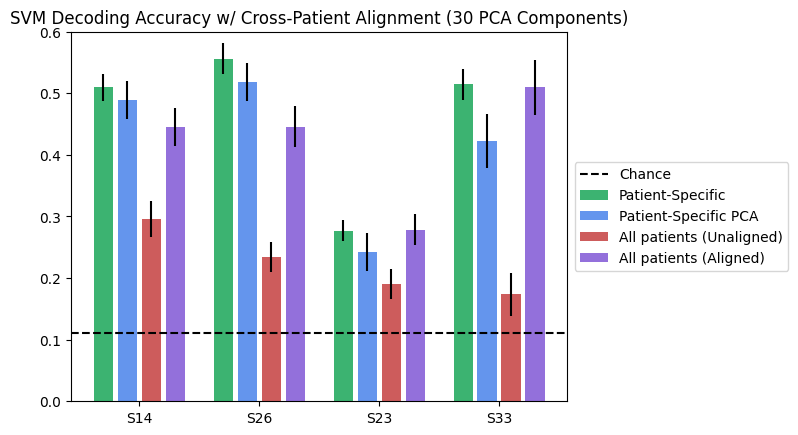

In [75]:
import matplotlib.pyplot as plt

ps = [S14_ps, S26_ps, S23_ps, S33_ps]
ps_pca_30_ct = [S14_ps_pca_30_ct, S26_ps_pca_30_ct, S23_ps_pca_30_ct, S33_ps_pca_30_ct]
tar_pca_30_ct = [S14_tar_pca_30_ct, S26_tar_pca_30_ct, S23_tar_pca_30_ct, S33_tar_pca_30_ct]
tar_pca_algn_30_ct = [S14_tar_pca_30_algn_ct, S26_tar_pca_30_algn_ct, S23_tar_pca_30_algn_ct, S33_tar_pca_30_algn_ct]

# f, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(0.4))
# ax1.bar([1, 6, 11, 16], list(map(np.mean, ps)), yerr=list(map(np.std, ps)), color='mediumseagreen')
# ax1.bar([2, 7, 12, 17], list(map(np.mean, ps_pca_10)), yerr=list(map(np.std, ps_pca_10)), color='cornflowerblue')
# ax1.bar([3, 8, 13, 18], list(map(np.mean, tar_pca_10)), yerr=list(map(np.std, tar_pca_10)), color='indianred')
# ax1.bar([4, 9, 14, 19], list(map(np.mean, tar_pca_algn_10)), yerr=list(map(np.std, tar_pca_algn_10)), color='mediumpurple')
# ax1.axhline(1/9, color='black', linestyle='--')
# ax1.set_xticks([2.5, 7.5, 12.5, 17.5], ['S14', 'S26', 'S23', 'S33'])
# ax1.set_ylabel('Decoding Accuracy')
# ax1.set_ylim([0, 0.6])
# ax1.set_title('10 PCA Components')

plt.figure()
plt.bar([1, 6, 11, 16], list(map(np.mean, ps)), yerr=list(map(np.std, ps)), color='mediumseagreen')
plt.bar([2, 7, 12, 17], list(map(np.mean, ps_pca_30_ct)), yerr=list(map(np.std, ps_pca_30_ct)), color='cornflowerblue')
plt.bar([3, 8, 13, 18], list(map(np.mean, tar_pca_30_ct)), yerr=list(map(np.std, tar_pca_30_ct)), color='indianred')
plt.bar([4, 9, 14, 19], list(map(np.mean, tar_pca_algn_30_ct)), yerr=list(map(np.std, tar_pca_algn_30_ct)), color='mediumpurple')
plt.axhline(1/9, color='black', linestyle='--')
plt.xticks([2.5, 7.5, 12.5, 17.5], ['S14', 'S26', 'S23', 'S33'])
# ax2.set_ylabel('Decoding Accuracy')
plt.ylim([0, 0.6])
plt.title('SVM Decoding Accuracy w/ Cross-Patient Alignment (30 PCA Components)')

# plt.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0]], ['Patient-Specific', 'All patients (Unaligned)', 'All patients (Aligned)'])
plt.legend(['Chance', 'Patient-Specific', 'Patient-Specific PCA', 'All patients (Unaligned)', 'All patients (Aligned)'], bbox_to_anchor=(1.46, 0.5), loc="center right")
plt.show()

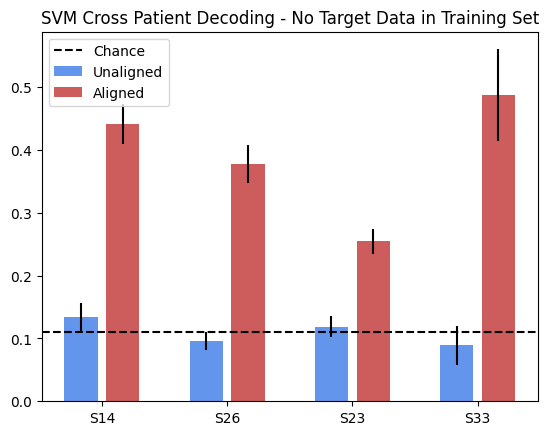

In [79]:
import matplotlib.pyplot as plt

pca_no_train_30_ct = [S14_tar_pca_30_no_train_ct, S26_tar_pca_30_no_train_ct, S23_tar_pca_30_no_train_ct, S33_tar_pca_30_no_train_ct]
pca_algn_no_train_30_ct = [S14_tar_pca_30_algn_no_train_ct, S26_tar_pca_30_algn_no_train_ct, S23_tar_pca_30_algn_no_train_ct, S33_tar_pca_30_algn_no_train_ct]

plt.figure()
plt.bar([1, 4, 7, 10], list(map(np.mean, pca_no_train_30_ct)), yerr=list(map(np.std, pca_no_train_30_ct)), color='cornflowerblue')
plt.bar([2, 5, 8, 11], list(map(np.mean, pca_algn_no_train_30_ct)), yerr=list(map(np.std, pca_algn_no_train_30_ct)), color='indianred')
plt.axhline(1/9, color='black', linestyle='--')
plt.xticks([1.5, 4.5, 7.5, 10.5], ['S14', 'S26', 'S23', 'S33'])
# ax2.set_ylabel('Decoding Accuracy')
plt.ylim(bottom=0)
plt.title('SVM Cross Patient Decoding - No Target Data in Training Set')

# plt.legend(['Chance', 'Unaligned', 'Aligned'], bbox_to_anchor=(1.4, 0.5), loc="center right")
plt.legend(['Chance', 'Unaligned', 'Aligned'])
plt.show()